<a href="https://colab.research.google.com/github/Rabramo/PosTech-DataAnalytics_TechChallenge_3/blob/main/TC_FASE_3_FIAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tech Challenge Fase 3** - Turma Data Analytics - 6DTA

**Faculdade de Informática e Administração Paulista - FIAP**



Grupo 37 - Data Analytics - 6DTAT

Rogério Abramo Alves Pretti - RM357672

Kathllen Santos Pinheiro Torres - RM356799

## O Desafio

Imagine agora que você foi contratado(a) como Expert em Data Analytics por um grande hospital para entender como foi o comportamento da população na época da pandemia da COVID-19 e quais indicadores seriam importantes para o planejamento, caso haja um novo surto da doença.

Apesar de ser contratado(a) agora, a sua área observou que a utilização do estudo do PNAD-COVID 19 do IBGE seria uma ótima base para termos boas respostas ao problema proposto, pois são dados confiáveis. Porém, não será necessário utilizar todas as perguntas realizadas na pesquisa para enxergar todas as oportunidades ali postas.

É sempre bom ressaltar que há dados triviais que precisam estar no projeto, pois auxiliam muito na análise dos dados:

• Características clínicas dos sintomas;

• Características da população;

• Características econômicas da sociedade.

O Head de Dados pediu para que você entrasse na base de dados do PNAD-COVID-19 do IBGE (https://covid19.ibge.gov.br/pnad-covid/) e organizasse esta base para análise, utilizando Banco de Dados em Nuvem e trazendo as seguintes características:

a. Utilização de no máximo 20 questionamentos realizados na pesquisa;

b. Utilizar 3 meses para construção da solução;

c. Caracterização dos sintomas clínicos da população;

d. Comportamento da população na época da COVID-19;

e. Características econômicas da Sociedade;

Seu objetivo será trazer uma breve análise dessas informações, como foi a organização do banco, as perguntas selecionadas para a resposta do problema e quais seriam as principais ações que o hospital deverá tomar em caso de um novo surto de COVID-19.

## A Base de Dados - PNAD - COVID19

A PNAD (Pesquisa Nacional por Amostra de Domicílios) é uma pesquisa realizada pelo IBGE (Instituto Brasileiro de Geografia e Estatística) para coletar dados sobre as condições socioeconômicas da população brasileira. Ela investiga temas como trabalho, rendimento, educação e características dos domicílios, fornecendo informações essenciais para entender a realidade do país.


Conduzida pelo IBGE, a **PNAD COVID19** foi realizada de maio a novembro de 2020. A coleta de dados iniciou-se em 4 de maio de 2020, com **entrevistas telefônicas** em aproximadamente **48 mil domicílios por semana**, totalizando cerca de **193 mil domicílios por mês em todo o território nacional**.

Fonte:
Instituto Brasileiro de Geografia e Estatística - IBGE em [ibge.gov.br](https://www.ibge.gov.br/)





## Instalação e Configuração do Spark

Este script instala as dependências necessárias para configurar o Apache Spark em um ambiente como o Google Colab. Inclui a instalação do Java (requisito para o Spark), o download e a configuração do Spark e a instalação do findspark.

In [1]:
!pip install pyspark==3.1.2 findspark
import os
import subprocess

# Atualizar a lista de pacotes do sistema operacional
subprocess.call("apt-get update -qq", shell=True)

# Verificar e instalar o OpenJDK 8, se necessário
if subprocess.call("dpkg -l | grep -q openjdk-11-jdk-headless", shell=True) != 0:
    print("Instalando OpenJDK 11...")
    subprocess.call("apt-get install openjdk-11-jdk-headless -qq > /dev/null", shell=True)
else:
    print("OpenJDK 11 já está instalado. Pulando...")

# Verificar se o Apache Spark já foi baixado e extraído
if not os.path.exists("spark-3.1.2-bin-hadoop2.7"):
    print("Baixando e extraindo Apache Spark...")
    subprocess.call("wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz", shell=True)
    subprocess.call("tar xf spark-3.1.2-bin-hadoop2.7.tgz", shell=True)
else:
    print("Apache Spark já está presente. Pulando...")

# Verificar se o findspark já está instalado
try:
    import findspark
    print("Findspark já está instalado. Pulando...")
except ImportError:
    print("Instalando findspark...")
    subprocess.call("pip install -q findspark", shell=True)

# Verificar se a versão correta do pyspark já está instalada
installed_pyspark_version = None
try:
    import pyspark
    installed_pyspark_version = pyspark.__version__
except ImportError:
    pass

required_pyspark_version = "3.1.2"
if installed_pyspark_version != required_pyspark_version:
    print(f"Instalando pyspark versão {required_pyspark_version}...")
    subprocess.call(f"pip install pyspark=={required_pyspark_version}", shell=True)
else:
    print(f"Pyspark versão {required_pyspark_version} já está instalada. Pulando...")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.4/212.4 MB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 13.1 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880746 sha256=d11726898ded3ff35e38faa83bb18eb23a5512ef5374a0f59064cb5649fd601c
  Stored in directory: /root/.cache/pip/wheels/ef/70/50/7882e1bcb5693225f7cc86698f10953201b48b3f36317c2d18
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7
  Attempting uninstall: pyspark
    Found existing installation: pyspark 3.5.3
    Uninstalling pyspark-3.5.3:
      Successfully uninstalled pyspark-3.5.3
OpenJDK 11 já está instalado. Pulando...
Baixando e extraindo Apache Spark...
Findspark já está instalado. Pulando...
Pyspark versão 3.1.2 já está instalada. Pulando...


Configuração das variáveis de ambiente necessárias para o funcionamento do Apache Spark. Definição dos caminhos para o Java (JAVA_HOME) e o Spark (SPARK_HOME).

In [2]:
# Importa o módulo os para manipulação de variáveis de ambiente
import os

# Define o caminho para o Java instalado (JAVA_HOME), necessário para o Apache Spark
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"

# Define o caminho para a instalação do Apache Spark (SPARK_HOME)
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

import findspark
findspark.init()

## Instalação e configuração de bibliotecas para gráficos

In [3]:
# Importa a biblioteca seaborn para visualização de dados
import seaborn as sns

# Importa a biblioteca matplotlib.pyplot para criar gráficos
import matplotlib.pyplot as plt

# Importa a biblioteca numpy para operações numéricas
import numpy as np

# Importa a função make_interp_spline da biblioteca scipy para interpolação de dados
from scipy.interpolate import make_interp_spline

# Atualização das configurações globais
plt.rcParams.update({
    "figure.figsize": (12, 6),   # Tamanho padrão do gráfico
    "axes.titlesize": 16,        # Tamanho do título
    "axes.labelsize": 12,        # Tamanho dos rótulos dos eixos
    "xtick.labelsize": 11,       # Tamanho das legendas do eixo X
    "ytick.labelsize": 11,       # Tamanho das legendas do eixo Y
    "lines.linewidth": 2,        # Espessura padrão das linhas
    "font.family": "DejaVu Sans" # Fonte universal e limpa
})

# Definir estilo e remover grid/bordas desnecessárias
sns.set_style("white")  # Fundo branco
sns.set_context("notebook", font_scale=1.2)

# Função para suavizar linhas (Spline Interpolation)
def suavizar_linha(x, y, pontos=300):
    """
    Suaviza uma linha usando interpolação spline.
    :param x: Coordenadas x originais.
    :param y: Coordenadas y originais.
    :param pontos: Número de pontos para suavização.
    :return: Novas coordenadas x e y suavizadas.
    """
    x_suave = np.linspace(0, len(x)-1, pontos)
    spline = make_interp_spline(np.arange(len(x)), y, k=3)
    y_suave = spline(x_suave)
    return x_suave, y_suave

# Função para remover bordas desnecessárias
def remover_bordas(ax):
    """
    Remove as bordas superiores e direitas de um gráfico.
    :param ax: Objeto de eixo do Matplotlib.
    """
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

print("Configurações globais atualizadas com sucesso!")


Configurações globais atualizadas com sucesso!


## Instanciando uma SparkSession

A criação de uma sessão Spark é essencial para permitir a interação com o Apache Spark em um ambiente Python. Por meio da biblioteca PySpark, essa sessão atua como a interface principal para gerenciar tarefas e processar dados. Aqui, são configurados parâmetros importantes, como o modo de execução, o nome da aplicação e a porta para a interface web do Spark (Spark UI).

Criação de uma sessão Spark utilizando a biblioteca PySpark. Essa sessão é necessária para interagir com o Apache Spark em um ambiente Python. São definidas configurações específicas como o modo de execução local, o nome da aplicação e a porta da interface web do Spark.

In [4]:
# Importa a biblioteca findspark, que permite inicializar o ambiente Spark no Python
import findspark

# Inicializa o findspark, configurando o Spark no ambiente Python.
# O método init() permite especificar manualmente o caminho da instalação do Spark (SPARK_HOME),
# neste caso, "/content/spark-3.1.2-bin-hadoop2.7".
findspark.init( )


In [5]:
from pyspark.sql import SparkSession

# Cria uma instância de SparkSession com as configurações básicas
spark = SparkSession.builder.master('local[*]').appName("PNAD COVID 7a9 2020").getOrCreate()

print("SparkSession criada com sucesso")

SparkSession criada com sucesso


##Tratamento dos Dados com PySpark

### Obtendo os dados e seleção dos 3 meses a serem utilizados (julho a setembro/2020)


Durante a pesquisa **PNAD COVID-19**, realizada de maio a novembro de 2020, foram aplicados **três questionários diferentes**, conforme o período do levantamento:

- **Questionário 1**: aplicado em **novembro**.
- **Questionário 2**: aplicado em **julho, agosto, setembro e outubro**.
- **Questionário 3**: aplicado em **maio e junho**.

> [Fonte Oficial](https://www.ibge.gov.br/estatisticas/sociais/saude/27947-divulgacao-mensal-pnadcovid2.html?=&t=notas-tecnicas)  

O desafio determina que a análise seja realizada em **três meses específicos**. Optamos pelos meses de **julho, agosto e setembro**, pois eles utilizaram o mesmo questionário (**Questionário 2**), garantindo maior consistência nos dados.

> [Detalhes do Questionário 2 no GitHub](https://github.com/Rabramo/Fiap-Postech-Tech-Challenge-Fase-3/blob/main/PNAD%20COVID_questiona%CC%81rio_julho_agosto_set_out.pdf)

Os arquivos originais da PNAD COVID-19, referentes aos meses escolhidos, estão disponíveis no formato compactado no site oficial do IBGE. Aqui estão os links e nomes dos arquivos:

- **Julho de 2020**: `PNAD_COVID_072020.zip`  
- **Agosto de 2020**: `PNAD_COVID_082020.zip`  
- **Setembro de 2020**: `PNAD_COVID_092020.zip`  

Você pode acessar esses arquivos diretamente na [seção de microdados do IBGE](https://covid19.ibge.gov.br/pnad-covid/).

Para facilitar o uso no ambiente do Google Colab, seguimos os passos abaixo:

1. **Download dos arquivos originais**: Os arquivos foram baixados do site do IBGE e estavam localizados inicialmente em `Downloads/Microdados/Dados`.
2. **Descompactação**: Os arquivos foram descompactados e organizados.
3. **Armazenamento no Google Drive**: Carregamos os dados no Google Drive e os configuramos como **públicos**, eliminando a necessidade de uploads manuais em cada nova execução do Colab.
4. **Integração no Colab**: Com essa abordagem, os dados podem ser acessados diretamente no ambiente, otimizando o fluxo de trabalho e a análise.


Nas linhas de código a seguir, realizaremos o download de três arquivos `.csv` diretamente para o ambiente do Google Colab, dando início ao processo de **ETL** (Extract, Transform, Load).

Optamos por utilizar a biblioteca `gdown` devido às seguintes vantagens:

- **Facilidade de uso**: download com links ou IDs de arquivos compartilhados.
- **Automatização de scripts**: ideal para integração em fluxos de trabalho.
- **Compatibilidade com links compartilhados**: suporta arquivos do Google Drive.
- **Suporte para arquivos grandes**: gerencia downloads acima de 100 MB sem necessidade de confirmação manual.
- **Download direto via ID do arquivo**: elimina a necessidade de URLs completas.
- **Integração com o Google Colab**: funciona perfeitamente no ambiente Colab.
- **Descompactação no fluxo de trabalho**: pode ser combinado com ferramentas para descompactar arquivos baixados.



In [8]:
import os
import gdown  # Biblioteca para download de arquivos do Google Drive

# URLs dos arquivos no Google Drive
url_df072020 = 'https://drive.google.com/uc?id=1yA-oM1ivJEKFVPbnlY92waU7_EN-t7dT'  # URL do arquivo de julho de 2020
url_df082020 = 'https://drive.google.com/uc?id=1t79MBIoq7Xa0y3BIKOESo5BFJsLpxnHF'  # URL do arquivo de agosto de 2020
url_df092020 = 'https://drive.google.com/uc?id=1QFSzaAgCeBUwwjNSeMMtBfV7KJQvwfN7'  # URL do arquivo de setembro de 2020

# Verificação e download dos arquivos
def download_if_not_exists(url, filename):
    if not os.path.exists(filename):  # Verifica se o arquivo já existe
        print(f"Baixando {filename}...")
        gdown.download(url, filename, quiet=False)  # Faz o download se não existir
    else:
        print(f"O arquivo {filename} já existe. Pulando download.")

# Baixar os arquivos CSV do Google Drive
download_if_not_exists(url_df072020, 'df072020.csv')
download_if_not_exists(url_df082020, 'df082020.csv')
download_if_not_exists(url_df092020, 'df092020.csv')


Baixando df072020.csv...


Downloading...
From (original): https://drive.google.com/uc?id=1yA-oM1ivJEKFVPbnlY92waU7_EN-t7dT
From (redirected): https://drive.google.com/uc?id=1yA-oM1ivJEKFVPbnlY92waU7_EN-t7dT&confirm=t&uuid=b1d5d7c0-77bf-4a04-9609-6d79bba11fe6
To: /content/df072020.csv
100%|██████████| 115M/115M [00:01<00:00, 76.8MB/s]


Baixando df082020.csv...


Downloading...
From (original): https://drive.google.com/uc?id=1t79MBIoq7Xa0y3BIKOESo5BFJsLpxnHF
From (redirected): https://drive.google.com/uc?id=1t79MBIoq7Xa0y3BIKOESo5BFJsLpxnHF&confirm=t&uuid=9003751b-5155-4281-b096-2a9f3d548faf
To: /content/df082020.csv
100%|██████████| 115M/115M [00:01<00:00, 97.8MB/s]


Baixando df092020.csv...


Downloading...
From (original): https://drive.google.com/uc?id=1QFSzaAgCeBUwwjNSeMMtBfV7KJQvwfN7
From (redirected): https://drive.google.com/uc?id=1QFSzaAgCeBUwwjNSeMMtBfV7KJQvwfN7&confirm=t&uuid=431def21-bc07-4130-a827-a7852a9eaae2
To: /content/df092020.csv
100%|██████████| 115M/115M [00:00<00:00, 183MB/s]


### Transformando os .csv em dataframe spark e criando um dataframe único

Para o carregamento dos arquivos, adotamos o seguinte procedimento:

1. **Carregamento dos arquivos CSV (`df072020.csv`, `df082020.csv`, `df092020.csv`)**:
   - Os arquivos são lidos como DataFrames Spark a partir do diretório `/content/`.
   - O cabeçalho (`header=True`) é usado para identificar os nomes das colunas.
   - O Spark infere automaticamente os tipos de dados das colunas (`inferSchema=True`).

2. **Exibição da primeira linha de cada DataFrame**:
   - O método `.show(1)` exibe a primeira linha de cada arquivo carregado para verificar se a leitura foi bem-sucedida.

Este processo é a etapa inicial para manipular e transformar os dados no Spark.


In [9]:
# Carregar o arquivo df072020.csv
df072020 = spark.read.csv("/content/df072020.csv", header=True, inferSchema=True)

# Carregar o arquivo df082020.csv
df082020 = spark.read.csv("/content/df082020.csv", header=True, inferSchema=True)

# Carregar o arquivo df092020.csv
df092020 = spark.read.csv("/content/df092020.csv", header=True, inferSchema=True)

# Mostrar a primeiras linha de um dos DataFrames
df072020.show(1)
df082020.show(1)
df092020.show(1)



+----+---+-------+-------+-----+-----+-----+-----+-------+---------+-----+-----+------+------------+------------+------+----+-----+------+------+------+----+----+----+----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+------+------+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+----+----+----+----+----+----+-----+-----+-----+----+----+-----+-----+-----+-----+-----+------+------+-----+----+----+-----+----+-----+------+------+-----+------+------+-----+-----+-----+------+-------+-------+------+-------+-------+----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+----+-----+-----+-----+-----+----+-----+-----+------+------+------+------+------+-----+----+
| Ano| UF|CAPITAL|RM_RIDE|V1008|V1012|V1013|V1016|Estrato|      UPA|V1022|V1023| V1030|       V1031|       V10

In [10]:
# Garantir que os esquemas sejam compatíveis
if df072020.schema == df082020.schema == df092020.schema:
    # Fazer o union dos DataFrames
    pnad_covid_7a9_2020 = df072020.union(df082020).union(df092020)

    print("Os esquemas dos DataFrames são idênticos e foi feita sua union como pnad_covid_7a9_2020.")
else:
    print("Os esquemas dos DataFrames não são idênticos. Ajuste-os antes de fazer o union.")


Os esquemas dos DataFrames são idênticos e foi feita sua union como pnad_covid_7a9_2020.


In [11]:
# Obter o "shape" no pyspark não tem, tem que improvisar conforme abaixo>
num_linhas = pnad_covid_7a9_2020.count()
num_colunas = len(pnad_covid_7a9_2020.columns)

print(f"Shape: ({num_linhas}, {num_colunas})")

Shape: (1157984, 145)


Após carregar os 3 arquivos e transformá-los em dataframe spark, iremos fazer a união dos 3 arquivo, seguindo os seguintes passos:

1. **Verificação de compatibilidade de esquemas**:
   - Confirma se os esquemas dos DataFrames `df072020`, `df082020` e `df092020` são idênticos usando a comparação de esquemas.

2. **União dos DataFrames**:
   - Caso os esquemas sejam compatíveis, os três DataFrames são unidos em um único DataFrame chamado `pnad_covid_7a9_2020` utilizando o método `.union()`.

3. **Feedback ao usuário**:
   - Exibe uma mensagem indicando se os esquemas são idênticos e a união foi realizada, ou se ajustes nos esquemas são necessários antes de proceder.

Este processo é essencial para consolidar os dados em um único DataFrame para análises subsequentes.


No PySpark, não existe um método equivalente ao `.shape` do Pandas, que retorna o número de linhas e colunas de um DataFrame de forma direta. No entanto, o mesmo resultado pode ser obtido separadamente utilizando os métodos disponíveis no PySpark:

1. **Número de Linhas**:
   - O método `.count()` é utilizado para contar o total de registros (linhas) no DataFrame.

2. **Número de Colunas**:
   - A função `len()` aplicada à propriedade `.columns` retorna o número total de colunas no DataFrame.

Conhecer o shape do DataFrame final é crucial para:
- Garantir que todos os dados esperados foram carregados e unificados corretamente.
- Validar que não houve duplicidade, perda de informações ou alterações inesperadas no número de colunas.
- Servir como base para futuras análises e transformações nos dados consolidados.

Este é um passo fundamental na etapa de preparação de dados para garantir a qualidade e integridade do conjunto de dados unificado.

In [12]:
pnad_covid_7a9_2020.show(10)

+----+---+-------+-------+-----+-----+-----+-----+-------+---------+-----+-----+------+------------+------------+------+----+-----+------+------+------+----+----+----+----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+------+------+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+----+----+----+----+----+----+-----+-----+-----+----+----+-----+-----+-----+-----+-----+------+------+-----+----+----+-----+----+-----+------+------+-----+------+------+-----+-----+-----+------+-------+-------+------+-------+-------+----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+----+-----+-----+-----+-----+----+-----+-----+------+------+------+------+------+-----+----+
| Ano| UF|CAPITAL|RM_RIDE|V1008|V1012|V1013|V1016|Estrato|      UPA|V1022|V1023| V1030|       V1031|       V10

### Excluindo e renomeando colunas

Conforme [dicionário de váriáveis](https://github.com/Rabramo/Fiap-Postech-Tech-Challenge-Fase-3/blob/main/diciona%CC%81rio_varia%CC%81veis.pdf) os dados do dataframe **pnad_covid_7a9_2020** estão divididos em:

**Parte 1 - Identificação e Controle (16 colunas):**

**Colunas:** Ano, UF, CAPITAL, RM_RIDE, V1008, V1012, V1013, V1016, Estrato, UPA, V1022, V1023, V1030, V1031, V1032, posest

**Parte A - Características gerais dos moradores (12 colunas)**:

**Colunas:** A001A, A001B1, A001B2, A001B3, A002, A003, A004, A005, A006, A007, A008, A009

**Parte B - COVID19 - Todos os moradores (sintomas) (44 colunas)**:

**Colunas:** B0011, B0012, B0013, B0014, B0015, B0016, B0017, B0018, B0019, B00110, B00111, B00112, B00113, B002, B0031, B0032, B0033, B0034, B0035, B0036, B0037, B0041, B0042, B0043, B0044, B0045, B0046, B005, B006, B007, B008, B009A, B009B, B009C, B009D, B009E, B009F, B0101, B0102, B0103, B0104, B0105, B0106, B011

**Parte C - Características de trabalho das pessoas de 14 anos ou mais de idade (43 colunas):**

**Colunas:** C001, C002, C003, C004, C005, C0051, C0052, C0053, C006, C007, C007A, C007B, C007C, C007D, C007E, C007E1, C007E2, C007F, C008, C009, C009A, C010, C0101, C01011, C01012, C0102, C01021, C01022, C0103, C0104, C011A, C011A1, C011A11, C011A12, C011A2, C011A21, C011A22, C012, C013, C014, C015, C016, C017A

**Parte D - Rendimento de outras fontes dos moradores de 14 anos ou mais de idade (14 colunas):**

**Colunas:** D0011, D0013, D0021, D0023, D0031, D0033, D0041, D0043, D0051, D0053, D0061, D0063, D0071, D0073

**Parte E - Empréstimos (5 colunas):**

**Colunas:** E001, E0021, E0022, E0023, E0024

**Parte Suplementar 01 - Características da habitação (10 colunas):**

**Colunas:** F001, F0021, F0022, F002A1, F002A2, F002A3, F002A4, F002A5, F0061, F006



In [13]:
from pyspark.sql.functions import col

# Exclusão das colunas que não serão utilizadas na P1
# Lista de colunas a serem excluídas
cols_excluir_p1 = ['Ano', 'CAPITAL', 'RM_RIDE', 'V1008', 'V1016',
                'Estrato', 'UPA', 'V1030', 'V1031', 'V1032', 'posest', ]

# Remover as colunas do DataFrame usando `drop`
pnad_covid_7a9_2020 = pnad_covid_7a9_2020.drop(*cols_excluir_p1)

# Renomear as colunas que serão utilizadas na P1
# Criar um mapeamento para renomear as colunas
colunas_renomear_p1 = {
    "V1012": "semana",
    "V1013": "mes",
    "V1022": "situacao_domicilio",
    "V1023": "tipo_area"
}
# Aplicar as renomeações de colunas
for antiga, nova in colunas_renomear_p1.items():
    pnad_covid_7a9_2020 = pnad_covid_7a9_2020.withColumnRenamed(antiga, nova)

# Exclusão das colunas que não serão utilizadas na PA
# Lista de colunas a serem excluídas
cols_excluir_PA = ['A001', 'A001B1', 'A001B2', 'A001B3']

# Remover as colunas do DataFrame
pnad_covid_7a9_2020 = pnad_covid_7a9_2020.drop(*cols_excluir_PA)

# Renomear as colunas que serão utilizadas
# Dicionário para renomear as colunas
colunas_renomear_PA = {
    'A001A': 'papel_no_domicilio',
    'A002': 'idade',
    'A003': 'genero',
    'A004': 'cor',
    'A005': 'escolaridade',
    'A006': 'frequenta_escola',
    'A007': 'atividades_escolares_em_casa',
    'A008': 'qtde_dias_estudo',
    'A009' :'qtde_horas_estudo_por_dia'
}

# Aplicar as renomeações de colunas
for antiga, nova in colunas_renomear_PA.items():
    pnad_covid_7a9_2020 = pnad_covid_7a9_2020.withColumnRenamed(antiga, nova)

# Renomear as colunas que serão utilizadas
colunas_renomear_PB = {
    'B0011': 'febre',
    'B0012': 'tosse',
    'B0013': 'dor_garganta',
    'B0014': 'dificuldade_respirar',
    'B0015': 'dor_cabeca',
    'B0016': 'dor_peito',
    'B0017': 'nausea',
    'B0018': 'nariz_entupido',
    'B0019': 'fadiga',
    'B00110': 'dor_olhos',
    'B00111': 'perda_cheiro_sabor',
    'B00112': 'dor_muscular',
    'B00113': 'diarreia',
    'B002': 'foi_estab_saude',
    'B0031': 'ficou_em_casa',
    'B0032': 'ligou_profissional',
    'B0033': 'remedio_conta_propria',
    'B0034': 'remedio_orientacao_medica',
    'B0035': 'visita_profissional_sus',
    'B0036': 'visita_profissional_particular',
    'B0037': 'outras_medidas',
    'B0041': 'atend_posto_saude',
    'B0042': 'atend_pronto_socorro_sus',
    'B0043': 'atend_hospital_sus',
    'B0044': 'atend_ambulatorio_privado',
    'B0045': 'atend_pronto_socorro_privado',
    'B0046': 'atend_hospital_privado',
    'B005': 'teve_internacao',
    'B006': 'uso_ventilacao_mecanica',
    'B007': 'possui_plano_saude',
    'B008': 'fez_teste_coronavirus',
    'B009A': 'teste_swab_boca_nariz',
    'B009B': 'res_teste_swab',
    'B009C': 'teste_sangue_furo_dedo',
    'B009D': 'res_teste_furo_dedo',
    'B009E': 'teste_sangue_veia_braco',
    'B009F': 'res_teste_veia_braco',
    'B0101': 'diabetes',
    'B0102': 'hipertensao',
    'B0103': 'asma_bronquite',
    'B0104': 'doencas_coracao',
    'B0105': 'depressao',
    'B0106': 'cancer',
    'B011':  'apos_teste_final'
}

# Lista de colunas a serem removidas
colunas_para_remover_PC = ['C01011', 'C01021', 'C011A11', 'C011A21', 'C010',
                        'C0101', 'C0102', 'C0103', 'C0104', 'C011A', 'C011A1', 'C011A2']
# Removendo as colunas do DataFrame
pnad_covid_7a9_2020 = pnad_covid_7a9_2020.drop(*colunas_para_remover_PC)


# Aplicar a renomeação de colunas em PB
for antiga, nova in colunas_renomear_PB.items():
    pnad_covid_7a9_2020 = pnad_covid_7a9_2020.withColumnRenamed(antiga, nova)

# Renomear as colunas em PC
colunas_renomear_PC = {
    'C001': 'trabalhou_ou_bico',
    'C002': 'afastado_trab',
    'C003': 'motivo_afast',
    'C004': 'continuou_pago',
    'C005': 'tempo_afast',
    'C0051': 'afast_1m_a_1a',
    'C0052': 'afast_1a_a_2a',
    'C0053': 'afast_2a_mais',
    'C006': 'mais_de_um_trab',
    'C007': 'tipo_trab',
    'C007A': 'area_trab',
    'C007B': 'vinculo_emprego',
    'C007C': 'cargo_funcao',
    'C007D': 'atividade_empresa',
    'C007E': 'num_empregados',
    'C007E1': 'empregados_1_a_5',
    'C007E2': 'empregados_6_a_10',
    'C007F': 'contrato_suspenso',
    'C008': 'horas_normais',
    'C009': 'horas_trab_real',
    'C009A': 'desejo_trab_mais',
    'C01012': 'valor_dinheiro',
    'C01022': 'valor_produtos',
    'C011A12': 'valor_out_dinheiro',
    'C011A22': 'valor_out_produtos',
    'C012': 'local_trab_constante',
    'C013': 'trab_remoto',
    'C014': 'contribui_inss',
    'C015': 'procurou_trab',
    'C016': 'motivo_nao_procurou',
    'C017A': 'desejo_trab_sem_procurar'}

# Aplicar a renomeação de colunas
for antiga, nova in colunas_renomear_PC.items():
    pnad_covid_7a9_2020 = pnad_covid_7a9_2020.withColumnRenamed(antiga, nova)

# Renomear as colunas em PD
colunas_renomear_PD = {
    'D0011': 'aposent_pensao',
    'D0013': 'soma_aposent_pensao',
    'D0021': 'pensao_doacao',
    'D0023': 'soma_pensao_doacao',
    'D0031': 'bolsa_familia',
    'D0033': 'soma_bolsa_familia',
    'D0041': 'bpc_loas',
    'D0043': 'soma_bpc_loas',
    'D0051': 'aux_emerg',
    'D0053': 'soma_aux_emerg',
    'D0061': 'seguro_desemprego',
    'D0063': 'soma_seguro_desemprego',
    'D0071': 'outros',
    'D0073': 'soma_outros'

}

for antiga, nova in colunas_renomear_PD.items():
    pnad_covid_7a9_2020 = pnad_covid_7a9_2020.withColumnRenamed(antiga, nova)

# Renomear as colunas em PE
colunas_renomear_PE = {
    'E001': 'solicitou_emp',
    'E0021': 'emp_banco_financeira',
    'E0022': 'emp_parente_amigo',
    'E0023': 'emp_empregado_patrao',
    'E0024': 'emp_outro'
}

for antiga, nova in colunas_renomear_PE.items():
    pnad_covid_7a9_2020 = pnad_covid_7a9_2020.withColumnRenamed(antiga, nova)

# Remover excluíndo a coluna FOO8 do DataFrame usando `drop`
pnad_covid_7a9_2020 = pnad_covid_7a9_2020.drop('F006')

# Renomear as colunas em PF
colunas_renomear_PF = {
    'F001': 'tipo_domicilio',
    'F0021': 'val_aluguel',
    'F0022': 'faixa_aluguel',
    'F002A1': 'sabao',
    'F002A2': 'alcool',
    'F002A3': 'mascaras',
    'F002A4': 'luvas',
    'F002A5': 'agua_sanitaria',
    'F0061': 'quem_respondeu'

}
for antiga, nova in colunas_renomear_PF.items():
    pnad_covid_7a9_2020 = pnad_covid_7a9_2020.withColumnRenamed(antiga, nova)

# Verificar o resultado pelo número de colunas
# Número de linhas e colunas
num_colunas = len(pnad_covid_7a9_2020.columns)  # Conta o número de colunas

# Exibindo o resultado
print(f"Após exclusões, o DataFrame ficou com {num_colunas} colunas da 145 originais.")

# Exibir uma linha do DataFrame para verificar a renomeação das colunas
pnad_covid_7a9_2020.show(1)


Após exclusões, o DataFrame ficou com 117 colunas da 145 originais.
+---+------+---+------------------+---------+------------------+-----+------+---+------------+----------------+----------------------------+----------------+-------------------------+-----+-----+------------+--------------------+----------+---------+------+--------------+------+---------+------------------+------------+--------+---------------+-------------+------------------+---------------------+-------------------------+-----------------------+------------------------------+--------------+-----------------+------------------------+------------------+-------------------------+----------------------------+----------------------+---------------+-----------------------+------------------+---------------------+---------------------+--------------+----------------------+-------------------+-----------------------+--------------------+--------+-----------+--------------+---------------+---------+------+----------------+---

Transformando valores categórico numéricos em categóricos descritivo, para melhorar a legibilidade e facilitar a análise.

In [14]:
# Exclusão das colunas que não serão utilizadas na P1
# Lista de colunas a serem excluídas
cols_excluir_p1 = ['Ano', 'CAPITAL', 'RM_RIDE', 'V1016', "V1008",
                'Estrato', 'UPA', 'V1030', 'V1031', 'V1032', 'posest', ]

# Remover as colunas do DataFrame usando `drop`
pnad_covid_7a9_2020 = pnad_covid_7a9_2020.drop(*cols_excluir_p1)

# Renomear as colunas que serão utilizadas na P1
# Criar um mapeamento para renomear as colunas
colunas_renomear_p1 = {
    "V1012": "semana",
    "V1013": "mes",
    "V1022": "situacao_domicilio",
    "V1023": "tipo_area"
}
# Aplicar as renomeações de colunas
for antiga, nova in colunas_renomear_p1.items():
    pnad_covid_7a9_2020 = pnad_covid_7a9_2020.withColumnRenamed(antiga, nova)

# Exclusão das colunas que não serão utilizadas na PA
# Lista de colunas a serem excluídas
cols_excluir_PA = ['A001', 'A001B1', 'A001B2', 'A001B3']

# Remover as colunas do DataFrame
pnad_covid_7a9_2020 = pnad_covid_7a9_2020.drop(*cols_excluir_PA)

# Renomear as colunas que serão utilizadas
# Dicionário para renomear as colunas
colunas_renomear_PA = {
    'A001A': 'papel_no_domicilio',
    'A002': 'idade',
    'A003': 'genero',
    'A004': 'cor',
    'A005': 'escolaridade',
    'A006': 'frequenta_escola',
    'A007': 'atividades_escolares_em_casa',
    'A008': 'qtde_dias_estudo',
    'A009' :'qtde_horas_estudo_por_dia'
}

# Aplicar as renomeações de colunas
for antiga, nova in colunas_renomear_PA.items():
    pnad_covid_7a9_2020 = pnad_covid_7a9_2020.withColumnRenamed(antiga, nova)

# Renomear as colunas que serão utilizadas
colunas_renomear_PB = {
    'B0011': 'febre',
    'B0012': 'tosse',
    'B0013': 'dor_garganta',
    'B0014': 'dificuldade_respirar',
    'B0015': 'dor_cabeca',
    'B0016': 'dor_peito',
    'B0017': 'nausea',
    'B0018': 'nariz_entupido',
    'B0019': 'fadiga',
    'B00110': 'dor_olhos',
    'B00111': 'perda_cheiro_sabor',
    'B00112': 'dor_muscular',
    'B00113': 'diarreia',
    'B002': 'foi_estab_saude',
    'B0031': 'ficou_em_casa',
    'B0032': 'ligou_profissional',
    'B0033': 'remedio_conta_propria',
    'B0034': 'remedio_orientacao_medica',
    'B0035': 'visita_profissional_sus',
    'B0036': 'visita_profissional_particular',
    'B0037': 'outras_medidas',
    'B0041': 'atend_posto_saude',
    'B0042': 'atend_pronto_socorro_sus',
    'B0043': 'atend_hospital_sus',
    'B0044': 'atend_ambulatorio_privado',
    'B0045': 'atend_pronto_socorro_privado',
    'B0046': 'atend_hospital_privado',
    'B005': 'teve_internacao',
    'B006': 'uso_ventilacao_mecanica',
    'B007': 'possui_plano_saude',
    'B008': 'fez_teste_coronavirus',
    'B009A': 'teste_swab_boca_nariz',
    'B009B': 'res_teste_swab',
    'B009C': 'teste_sangue_furo_dedo',
    'B009D': 'res_teste_furo_dedo',
    'B009E': 'teste_sangue_veia_braco',
    'B009F': 'res_teste_veia_braco',
    'B0101': 'diabetes',
    'B0102': 'hipertensao',
    'B0103': 'asma_bronquite',
    'B0104': 'doencas_coracao',
    'B0105': 'depressao',
    'B0106': 'cancer',
    'B011':  'apos_teste_final'
}

# Lista de colunas a serem removidas
colunas_para_remover_PC = ['C01011', 'C01021', 'C011A11', 'C011A21', 'C010',
                        'C0101', 'C0102', 'C0103', 'C0104', 'C011A', 'C011A1', 'C011A2']
# Removendo as colunas do DataFrame
pnad_covid_7a9_2020 = pnad_covid_7a9_2020.drop(*colunas_para_remover_PC)


# Aplicar a renomeação de colunas em PB
for antiga, nova in colunas_renomear_PB.items():
    pnad_covid_7a9_2020 = pnad_covid_7a9_2020.withColumnRenamed(antiga, nova)

# Renomear as colunas em PC
colunas_renomear_PC = {
    'C001': 'trabalhou_ou_bico',
    'C002': 'afastado_trab',
    'C003': 'motivo_afast',
    'C004': 'continuou_pago',
    'C005': 'tempo_afast',
    'C0051': 'afast_1m_a_1a',
    'C0052': 'afast_1a_a_2a',
    'C0053': 'afast_2a_mais',
    'C006': 'mais_de_um_trab',
    'C007': 'tipo_trab',
    'C007A': 'area_trab',
    'C007B': 'vinculo_emprego',
    'C007C': 'cargo_funcao',
    'C007D': 'atividade_empresa',
    'C007E': 'num_empregados',
    'C007E1': 'empregados_1_a_5',
    'C007E2': 'empregados_6_a_10',
    'C007F': 'contrato_suspenso',
    'C008': 'horas_normais',
    'C009': 'horas_trab_real',
    'C009A': 'desejo_trab_mais',
    'C01012': 'valor_dinheiro',
    'C01022': 'valor_produtos',
    'C011A12': 'valor_out_dinheiro',
    'C011A22': 'valor_out_produtos',
    'C012': 'local_trab_constante',
    'C013': 'trab_remoto',
    'C014': 'contribui_inss',
    'C015': 'procurou_trab',
    'C016': 'motivo_nao_procurou',
    'C017A': 'desejo_trab_sem_procurar'}

# Aplicar a renomeação de colunas
for antiga, nova in colunas_renomear_PC.items():
    pnad_covid_7a9_2020 = pnad_covid_7a9_2020.withColumnRenamed(antiga, nova)

# Renomear as colunas em PD
colunas_renomear_PD = {
    'D0011': 'aposent_pensao',
    'D0013': 'soma_aposent_pensao',
    'D0021': 'pensao_doacao',
    'D0023': 'soma_pensao_doacao',
    'D0031': 'bolsa_familia',
    'D0033': 'soma_bolsa_familia',
    'D0041': 'bpc_loas',
    'D0043': 'soma_bpc_loas',
    'D0051': 'aux_emerg',
    'D0053': 'soma_aux_emerg',
    'D0061': 'seguro_desemprego',
    'D0063': 'soma_seguro_desemprego',
    'D0071': 'outros',
    'D0073': 'soma_outros'

}

for antiga, nova in colunas_renomear_PD.items():
    pnad_covid_7a9_2020 = pnad_covid_7a9_2020.withColumnRenamed(antiga, nova)

# Renomear as colunas em PE
colunas_renomear_PE = {
    'E001': 'solicitou_emp',
    'E0021': 'emp_banco_financeira',
    'E0022': 'emp_parente_amigo',
    'E0023': 'emp_empregado_patrao',
    'E0024': 'emp_outro'
}

for antiga, nova in colunas_renomear_PE.items():
    pnad_covid_7a9_2020 = pnad_covid_7a9_2020.withColumnRenamed(antiga, nova)

# Remover excluíndo a coluna FOO8 do DataFrame usando `drop`
pnad_covid_7a9_2020 = pnad_covid_7a9_2020.drop('F006')

# Renomear as colunas em PF
colunas_renomear_PF = {
    'F001': 'tipo_domicilio',
    'F0021': 'val_aluguel',
    'F0022': 'faixa_aluguel',
    'F002A1': 'sabao',
    'F002A2': 'alcool',
    'F002A3': 'mascaras',
    'F002A4': 'luvas',
    'F002A5': 'agua_sanitaria',
    'F0061': 'quem_respondeu'

}
for antiga, nova in colunas_renomear_PF.items():
    pnad_covid_7a9_2020 = pnad_covid_7a9_2020.withColumnRenamed(antiga, nova)

# Verificar o resultado pelo número de colunas
# Número de linhas e colunas
num_colunas = len(pnad_covid_7a9_2020.columns)  # Conta o número de colunas

# Exibindo o resultado
print(f"Após exclusões, o DataFrame ficou com {num_colunas} colunas da 145 originais.")

# Exibir uma linha do DataFrame para verificar a renomeação das colunas
pnad_covid_7a9_2020.show(1)


Após exclusões, o DataFrame ficou com 117 colunas da 145 originais.
+---+------+---+------------------+---------+------------------+-----+------+---+------------+----------------+----------------------------+----------------+-------------------------+-----+-----+------------+--------------------+----------+---------+------+--------------+------+---------+------------------+------------+--------+---------------+-------------+------------------+---------------------+-------------------------+-----------------------+------------------------------+--------------+-----------------+------------------------+------------------+-------------------------+----------------------------+----------------------+---------------+-----------------------+------------------+---------------------+---------------------+--------------+----------------------+-------------------+-----------------------+--------------------+--------+-----------+--------------+---------------+---------+------+----------------+---

In [15]:
from pyspark.sql.functions import col, when, concat, lit, count, coalesce

# Função para criar uma expressão de mapeamento genérica
def create_mapping_expr(column, mapping):
    expr = when(col(column) == list(mapping.keys())[0], mapping[list(mapping.keys())[0]])
    for key, value in list(mapping.items())[1:]:
        expr = expr.when(col(column) == key, value)
    return expr.otherwise(col(column)) # Retornar o valor original se não houver mapeamento

# # Dicionários de mapeamento para tornar os dados descritivos em

mapeamentos = {
    # Parte 1 - Identificação e Controle
    "UF": {
    11: "RO", 12: "AC", 13: "AM", 14: "RR", 15: "PA", 16: "AP", 17: "TO",
    21: "MA", 22: "PI", 23: "CE", 24: "RN", 25: "PB", 26: "PE", 27: "AL", 28: "SE",
    29: "BA", 31: "MG", 32: "ES", 33: "RJ", 35: "SP", 41: "PR", 42: "SC", 43: "RS",
    50: "MS", 51: "MT", 52: "GO", 53: "DF"
},
    "mes": {
        1: "jan", 2: "fev", 3: "mar", 4: "abr", 5: "mai", 6: "jun",
        7: "jul", 8: "ago", 9: "set", 10: "out", 11: "nov", 12: "dez"
    },
    "situacao_domicilio": {
        1: "Urbana",
        2: "Rural"
    },
    "tipo_area": {
        1: "Região Metropolitana",
        2: "Região Metropolitana",
        3: "Interior",
        4: "Interior"
    },
    # Parte A - Características gerais dos moradores
    "papel_no_domicilio": {
        1: "Responsável pelo domicílio",
        2: "Cônjuge/companheiro(a) de sexo diferente",
        3: "Cônjuge/companheiro(a) do mesmo sexo",
        4: "Filho(a) do responsável e do cônjuge",
        5: "Filho(a) somente do responsável",
        6: "Filho(a) somente do cônjuge",
        7: "Genro/nora",
        8: "Pai/mãe/padrasto/madrasta",
        9: "Sogro(a)",
        10: "Neto(a)",
        11: "Bisneto(a)",
        12: "Irmão/irmã",
        13: "Avô/avó",
        14: "Outro parente",
        15: "Agregado(a)",
        16: "Convivente",
        17: "Pensionista",
        18: "Empregado(a) doméstico(a)",
        19: "Parente do(a) empregado(a) doméstico(a)"
    },
    "genero": {
        1: "Homem",
        2: "Mulher"
    },
    "cor": {
        1: "Branca",
        2: "Preta",
        3: "Amarela",
        4: "Parda",
        5: "Indígena",
        9: "Ignorado"
    },
    "escolaridade": {
        1: "Sem instrução",
        2: "Fundamental incompleto",
        3: "Fundamental completo",
        4: "Médio incompleto",
        5: "Médio completo",
        6: "Superior incompleto",
        7: "Superior completo",
        8: "Pós-graduação, mestrado ou doutorado"
    },
    "frequenta_escola": {
        1: "Sim",
        2: "Não"
    },
    "atividades_escolares_em_casa": {
        1: "Sim, e realizou pelo menos parte delas",
        2: "Sim, mas não realizou",
        3: "Não",
        4: "Não, porque estava de férias"
    },
    "qtde_dias_estudo": {
        1: "1 dia",
        2: "2 dias",
        3: "3 dias",
        4: "4 dias",
        5: "5 dias",
        6: "6 ou 7 dias"
    },
    "qtde_horas_estudo_por_dia": {
        1: "Menos de 1 hora",
        2: "De 1 hora a menos de 2 horas",
        3: "De 2 horas a menos de 5 horas",
        4: "5 horas ou mais"
    },
    # Parte B - COVID19 - Todos os moradores
    "febre": {1: "Sim", 2: "Não", 3: "Não sabe"},
    "tosse": {1: "Sim", 2: "Não", 3: "Não sabe"},
    "dor_garganta": {1: "Sim", 2: "Não", 3: "Não sabe"},
    "dificuldade_respirar": {1: "Sim", 2: "Não", 3: "Não sabe"},
    "dor_cabeca": {1: "Sim", 2: "Não", 3: "Não sabe"},
    "dor_peito": {1: "Sim", 2: "Não", 3: "Não sabe"},
    "nausea": {1: "Sim", 2: "Não", 3: "Não sabe"},
    "nariz_entupido": {1: "Sim", 2: "Não", 3: "Não sabe"},
    "fadiga": {1: "Sim", 2: "Não", 3: "Não sabe"},
    "dor_olhos": {1: "Sim", 2: "Não", 3: "Não sabe"},
    "perda_cheiro_sabor": {1: "Sim", 2: "Não", 3: "Não sabe"},
    "dor_muscular": {1: "Sim", 2: "Não", 3: "Não sabe"},
    "diarreia": {1: "Sim", 2: "Não", 3: "Não sabe", 9: "Ignorado"},
    "foi_estab_saude": {1: "Sim", 2: "Não", 9: "Ignorado"},
    "ficou_em_casa": {1: "Sim", 2: "Não", 9: "Ignorado"},
    "ligou_profissional": {1: "Sim", 2: "Não", 9: "Ignorado"},
    "remedio_conta_propria": {1: "Sim", 2: "Não", 9: "Ignorado"},
    "remedio_orientacao_medica": {1: "Sim", 2: "Não", 9: "Ignorado"},
    "visita_profissional_sus": {1: "Sim", 2: "Não", 9: "Ignorado"},
    "visita_profissional_particular": {1: "Sim", 2: "Não", 9: "Ignorado"},
    "outras_medidas": {1: "Sim", 2: "Não", 9: "Ignorado"},
    "teve_internacao": {1: "Sim", 2: "Não", 3: "Não foi atendido", 9: "Ignorado"},
    "uso_ventilacao_mecanica": {1: "Sim", 2: "Não", 9: "Ignorado"},
    "possui_plano_saude": {1: "Sim", 2: "Não", 9: "Ignorado"},
    "fez_teste_coronavirus": {1: "Sim", 2: "Não", 9: "Ignorado"},
    "teste_swab_boca_nariz": {1: "Sim", 2: "Não", 9: "Ignorado"},
    "teste_sangue_furo_dedo": {1: "Sim", 2: "Não", 9: "Ignorado"},
    "teste_sangue_veia_braco": {1: "Sim", 2: "Não", 9: "Ignorado"},
    "res_teste_swab": {1: "Positivo", 2: "Negativo", 3: "Inconclusivo", 4: "Ainda não recebeu", 9: "Ignorado"},
    "res_teste_furo_dedo": {1: "Positivo", 2: "Negativo", 3: "Inconclusivo", 4: "Ainda não recebeu", 9: "Ignorado"},
    "res_teste_veia_braco": {1: "Positivo", 2: "Negativo", 3: "Inconclusivo", 4: "Ainda não recebeu", 9: "Ignorado"},
    "diabetes": {1: "Sim", 2: "Não", 9: "Ignorado"},
    "hipertensao": {1: "Sim", 2: "Não", 9: "Ignorado"},
    "asma_bronquite": {1: "Sim", 2: "Não", 9: "Ignorado"},
    "doencas_coracao": {1: "Sim", 2: "Não", 9: "Ignorado"},
    "depressao": {1: "Sim", 2: "Não", 9: "Ignorado"},
    "cancer": {1: "Sim", 2: "Não", 9: "Ignorado"},
    "apos_teste_final": {
        1: "Não fez restrição, levou vida normal como antes da pandemia",
        2: "Reduziu o contato com as pessoas, mas continuou saindo de casa para trabalho ou atividades não essenciais e/ou recebendo visitas",
        3: "Ficou em casa e só saiu em caso de necessidade básica",
        4: "Ficou rigorosamente em casa",
        9: "Ignorado"
    },

    # Parte C - Características de trabalho das pessoas de 14 anos ou mais de idade
    "trabalhou_ou_bico": {1: "Sim", 2: "Não"},
    "afastado_trab": {1: "Sim", 2: "Não"},
    "motivo_afast": {
        1: "Quarentena/férias coletivas",
        2: "Férias/jornada variável",
        3: "Licença maternidade/paternidade",
        4: "Licença saúde/acidente",
        5: "Outro tipo de licença remunerada",
        6: "Afastamento sem remuneração",
        7: "Fatores ocasionais",
        8: "Outro motivo"
    },
    "continuou_pago": {1: "Sim", 2: "Não", 3: "Trabalho já não era remunerado"},
    "tempo_afast": {
        1: "Menos de 1 mês",
        2: "1 mês a menos de 1 ano",
        3: "1 a 2 anos",
        4: "2 anos ou mais"
    },
    "tipo_trab": {
        1: "Trabalhador doméstico",
        2: "Militar",
        3: "Policial/Bombeiro",
        4: "Empregado setor privado",
        5: "Empregado setor público",
        6: "Empregador",
        7: "Conta própria",
        8: "Trabalhador familiar",
        9: "Fora do mercado"
    },
    "vinculo_emprego": {
        1: "Carteira assinada",
        2: "Servidor estatutário",
        3: "Sem vínculo"
    },
    "cargo_funcao": {
          1: "Empregado doméstico, diarista, cozinheiro (em domicílios particulares)",
          2: "Faxineiro, auxiliar de limpeza etc. (em empresa pública ou privada)",
          3: "Auxiliar de escritório, escriturário",
          4: "Secretária, recepcionista",
          5: "Operador de Telemarketing",
          6: "Comerciante (dono do bar, da loja etc.)",
          7: "Balconista, vendedor de loja",
          8: "Vendedor a domicílio, representante de vendas, vendedor de catálogo (Avon, Natura etc.)",
          9: "Vendedor ambulante (feirante, camelô, comerciante de rua, quiosque)",
          10: "Cozinheiro e garçon (de restaurantes, empresas)",
          11: "Padeiro, açougueiro e doceiro",
          12: "Agricultor, criador de animais, pescador, silvicultor e jardineiro",
          13: "Auxiliar da agropecuária (colhedor de frutas, boia fria, etc.)",
          14: "Motorista (de aplicativo, de taxi, de van, de mototáxi, de ônibus)",
          15: "Motorista de caminhão (caminhoneiro)",
          16: "Motoboy",
          17: "Entregador de mercadorias (de restaurante, de farmácia, de loja, Uber Eats, IFood, Rappy etc.)",
          18: "Pedreiro, servente de pedreiro, pintor, eletricista, marceneiro",
          19: "Mecânico de veículos, máquinas industriais etc.",
          20: "Artesão, costureiro e sapateiro",
          21: "Cabeleireiro, manicure e afins",
          22: "Operador de máquinas, montador na indústria",
          23: "Auxiliar de produção, de carga e descarga",
          24: "Professor da educação infantil, de ensino fundamental, médio ou superior",
          25: "Pedagogo, professor de idiomas, música, arte e reforço escolar",
          26: "Médico, enfermeiro, profissionais de saúde de nível superior",
          27: "Técnico, profissional da saúde de nível médio",
          28: "Cuidador de crianças, doentes ou idosos",
          29: "Segurança, vigilante, outro trabalhador dos serviços de proteção",
          30: "Policial civil",
          31: "Porteiro, zelador",
          32: "Artista, religioso (padre, pastor etc.)",
          33: "Diretor, gerente, cargo político ou comissionado",
          34: "Outra profissão de nível superior (advogado, engenheiro, contador, jornalista etc.)",
          35: "Outro técnico ou profissional de nível médio",
          36: "Outros",
          None: "não aplicável"},

          'atividade_empresa' :{
          1: "Agricultura, pecuária, produção florestal e pesca",
          2: "Extração de petróleo, carvão mineral, minerais metálicos, pedra, areia, sal etc.",
          3: "Indústria da transformação (inclusive confecção e fabricação caseira)",
          4: "Fornecimento de eletricidade e gás, água, esgoto e coleta de lixo",
          5: "Construção",
          6: "Comércio no atacado e varejo",
          7: "Reparação de veículos automotores e motocicletas",
          8: "Transporte de passageiros",
          9: "Transporte de mercadorias",
          10: "Armazenamento, correios e serviços de entregas",
          11: "Hospedagem (hotéis, pousadas etc.)",
          12: "Serviço de alimentação (bares, restaurantes, ambulantes de alimentação)",
          13: "Informação e comunicação (jornais, rádio e televisão, telecomunicações e informática)",
          14: "Bancos, atividades financeiras e de seguros",
          15: "Atividades imobiliárias",
          16: "Escritórios de advocacia, engenharia, publicidade e veterinária (Atividades profissionais, científicas e técnicas)",
          17: "Atividades de locação de mão de obra, segurança, limpeza, paisagismo e teleatendimento",
          18: "Administração pública (governo federal, estadual e municipal)",
          19: "Educação",
          20: "Saúde humana e assistência social",
          21: "Organizações religiosas, sindicatos e associações",
          22: "Atividade artísticas, esportivas e de recreação",
          23: "Cabeleireiros, tratamento de beleza e serviços pessoais",
          24: "Serviço doméstico remunerado",
          25: "Outro",
          None: "Não aplicável"
      },
    "contrato_suspenso": {1: "Sim", 2: "Não"},
    "trab_remoto": {1: "Sim", 2: "Não"},
    "contribui_inss": {1: "Sim", 2: "Não"},
    "procurou_trab": {1: "Sim", 2: "Não"},
    "motivo_nao_procurou": {
        1: "Pandemia - para manter dist. social",
        2: "Saúde/gravidez",
        3: "Estudando",
        4: "Não quer ou é aposentado",
        5: "Sem experiência ou qualificação",
        6: "Muito jovem ou muito idoso",
        7: "Falta de trabalho na localidade",
        8: "Tem que cuidar da casas ou parentes",
        9: "Aguardando resposta",
        10: "Outro motivo"
    },
    "desejo_trab_sem_procurar": {1: "Sim", 2: "Não"},

    # Parte D - Rendimento de outras fontes dos moradores de 14 anos ou mais de idade
    "aposent_pensao": {1: "Sim", 2: "Não"},
    "pensao_doacao": {1: "Sim", 2: "Não"},
    "bolsa_familia": {1: "Sim", 2: "Não"},
    "bpc_loas": {1: "Sim", 2: "Não"},
    "aux_emerg": {1: "Sim", 2: "Não"},
    "seguro_desemprego": {1: "Sim", 2: "Não"},
    "outros": {1: "Sim", 2: "Não"},

    # Parte E - Empréstimos
    "solicitou_emp": {
        1: "Sim, e pelo menos um morador conseguiu",
        2: "Sim, mas nenhum morador conseguiu",
        3: "Não solicitou"
    },
    "emp_banco_financeira": {1: "Sim", 2: "Não"},
    "emp_parente_amigo": {1: "Sim", 2: "Não"},
    "emp_empregado_patrao": {1: "Sim", 2: "Não"},
    "emp_outro": {1: "Sim", 2: "Não"},

    # Parte Suplementar 01 - Características da habitação
    "tipo_domicilio" : {
    1: 'Próprio - já pago',
    2: 'Próprio - ainda pagando',
    3: 'Alugado',
    4: 'Cedido por empregador',
    5: 'Cedido por familiar',
    6: 'Cedido de outra forma',
    7: 'Outra condição'
},

    "sabao": {1: "Sim", 2: "Não", 3: "Não sabe"},
    "alcool": {1: "Sim", 2: "Não", 3: "Não sabe"},
    "mascaras": {1: "Sim", 2: "Não", 3: "Não sabe"},
    "luvas": {1: "Sim", 2: "Não", 3: "Não sabe"},
    "agua_sanitaria": {1: "Sim", 2: "Não", 3: "Não sabe"},
    "quem_respondeu": {
        1: "Pessoa moradora",
        2: "Pessoa não moradora",
        9: "Ignorado"
    }
}
for column, mapping in mapeamentos.items():
    if column in pnad_covid_7a9_2020.columns:
        pnad_covid_7a9_2020 = pnad_covid_7a9_2020.withColumn(column, create_mapping_expr(column, mapping))
    else:
        print(f"Coluna {column} não encontrada no DataFrame.")


In [16]:
pnad_covid_7a9_2020.show(truncate=False) # ver dataframe spark sem truncar

+---+------+---+------------------+--------------------+----------------------------------------+-----+------+-------+----------------------+----------------+--------------------------------------+----------------+-----------------------------+-----+-----+------------+--------------------+----------+---------+------+--------------+------+---------+------------------+------------+--------+---------------+-------------+------------------+---------------------+-------------------------+-----------------------+------------------------------+--------------+-----------------+------------------------+------------------+-------------------------+----------------------------+----------------------+---------------+-----------------------+------------------+---------------------+---------------------+--------------+----------------------+-------------------+-----------------------+--------------------+--------+-----------+--------------+---------------+---------+------+---------------------------

In [17]:
pnad_covid_7a9_2020.printSchema()

root
 |-- UF: string (nullable = true)
 |-- semana: integer (nullable = true)
 |-- mes: string (nullable = true)
 |-- situacao_domicilio: string (nullable = true)
 |-- tipo_area: string (nullable = true)
 |-- papel_no_domicilio: string (nullable = true)
 |-- idade: integer (nullable = true)
 |-- genero: string (nullable = true)
 |-- cor: string (nullable = true)
 |-- escolaridade: string (nullable = true)
 |-- frequenta_escola: string (nullable = true)
 |-- atividades_escolares_em_casa: string (nullable = true)
 |-- qtde_dias_estudo: string (nullable = true)
 |-- qtde_horas_estudo_por_dia: string (nullable = true)
 |-- febre: string (nullable = true)
 |-- tosse: string (nullable = true)
 |-- dor_garganta: string (nullable = true)
 |-- dificuldade_respirar: string (nullable = true)
 |-- dor_cabeca: string (nullable = true)
 |-- dor_peito: string (nullable = true)
 |-- nausea: string (nullable = true)
 |-- nariz_entupido: string (nullable = true)
 |-- fadiga: string (nullable = true)
 |-

Criando novas colunas.

In [18]:
# Biblioteca do PySpark para manipulação de colunas e DataFrames
from pyspark.sql.functions import col, when, concat, lit  # Importa concat e lit para manipulação de strings
from functools import reduce  # Biblioteca padrão do Python para aplicar funções cumulativas (reduce)

# Definir o salário mínimo vigente em julho a setembro de 2020
salario_minimo_2020 = 1045.00

# Lista de colunas de sintomas
sintomas = [
    'febre', 'tosse', 'dor_garganta', 'dificuldade_respirar',
    'dor_cabeca', 'dor_peito', 'nausea', 'nariz_entupido',
    'fadiga', 'dor_olhos', 'perda_cheiro_sabor',
    'dor_muscular', 'diarreia'
]

# Criar a coluna "teve_sintoma" para indicar se houve algum sintoma
pnad_covid_7a9_2020 = pnad_covid_7a9_2020.withColumn(
    "teve_sintoma",
    when(reduce(lambda x, y: x | y, [col(sintoma) == "Sim" for sintoma in sintomas]), "Sim").otherwise("Não")
)

# Criar a coluna "qtde_sintomas" para contar o número de sintomas
pnad_covid_7a9_2020 = pnad_covid_7a9_2020.withColumn(
    "qtde_sintomas",
    reduce(lambda x, y: x + y, [when(col(sintoma) == "Sim", 1).otherwise(0) for sintoma in sintomas])
)

# Criar a coluna "total_rend" com o tratamento explícito de valores nulos
pnad_covid_7a9_2020 = pnad_covid_7a9_2020.withColumn(
    "total_rend",
    (when(col("soma_outros").isNotNull(), col("soma_outros").cast("double")).otherwise(0)) +
    (when(col("valor_dinheiro").isNotNull(), col("valor_dinheiro").cast("double")).otherwise(0)) +
    (when(col("valor_produtos").isNotNull(), col("valor_produtos").cast("double")).otherwise(0)) +
    (when(col("valor_out_dinheiro").isNotNull(), col("valor_out_dinheiro").cast("double")).otherwise(0)) +
    (when(col("valor_out_produtos").isNotNull(), col("valor_out_produtos").cast("double")).otherwise(0))
)

# Criar a coluna "faixa_rend" para classificar em faixas de salários mínimos
pnad_covid_7a9_2020 = pnad_covid_7a9_2020.withColumn(
    "faixa_rend",
    when(col("total_rend") / salario_minimo_2020 <= 2, "Até 2 salários mínimos")
    .when((col("total_rend") / salario_minimo_2020 > 2) & (col("total_rend") / salario_minimo_2020 <= 5), "De 2 a 5 salários mínimos")
    .when((col("total_rend") / salario_minimo_2020 > 5) & (col("total_rend") / salario_minimo_2020 <= 10), "De 5 a 10 salários mínimos")
    .otherwise("Acima de 10 salários mínimos")
)

# Criar a coluna "quant_salarios_minimos" para armazenar a quantidade de salários mínimos
pnad_covid_7a9_2020 = pnad_covid_7a9_2020.withColumn(
    "quant_salarios_minimos",
    col("total_rend") / salario_minimo_2020
)

# Exibir uma amostra do DataFrame
pnad_covid_7a9_2020.show(truncate=False)


+---+------+---+------------------+--------------------+----------------------------------------+-----+------+-------+----------------------+----------------+--------------------------------------+----------------+-----------------------------+-----+-----+------------+--------------------+----------+---------+------+--------------+------+---------+------------------+------------+--------+---------------+-------------+------------------+---------------------+-------------------------+-----------------------+------------------------------+--------------+-----------------+------------------------+------------------+-------------------------+----------------------------+----------------------+---------------+-----------------------+------------------+---------------------+---------------------+--------------+----------------------+-------------------+-----------------------+--------------------+--------+-----------+--------------+---------------+---------+------+---------------------------

In [19]:
# Biblioteca do PySpark para manipulação de colunas e DataFrames
from pyspark.sql.functions import col, when, concat, lit  # Importa concat e lit para manipulação de strings
from functools import reduce  # Biblioteca padrão do Python para aplicar funções cumulativas (reduce)

# Adiciona a coluna "semana_mes" no formato desejado
pnad_covid_7a9_2020 = pnad_covid_7a9_2020.withColumn(
    "semana_mes",
    concat(
        col("semana"),  # Número da semana
        lit(" "),  # Texto fixo
        col("mes")  # Nome do mês
    )
)

# Remove a coluna "semana"
pnad_covid_7a9_2020 = pnad_covid_7a9_2020.drop("semana")

# Obtém a lista de colunas e reorganiza para que "semana_mes" seja a segunda
colunas = pnad_covid_7a9_2020.columns
nova_ordem = [colunas[0], "semana_mes"] + [col for col in colunas if col != "semana_mes"]

# Lista das colunas de sintomas
sintomas = [
    'febre', 'tosse', 'dor_garganta', 'dificuldade_respirar',
    'dor_cabeca', 'dor_peito', 'nausea', 'nariz_entupido',
    'fadiga', 'dor_olhos', 'perda_cheiro_sabor',
    'dor_muscular', 'diarreia'
]

# Criar a coluna "teve_sintoma"
pnad_covid_7a9_2020 = pnad_covid_7a9_2020.withColumn(
    "teve_sintoma",
    when(
        reduce(lambda x, y: x | y, [col(sintoma) == "Sim" for sintoma in sintomas]),
        "Sim"
    ).otherwise("Não")
)

# Criar a coluna "qtde_sintomas"
pnad_covid_7a9_2020 = pnad_covid_7a9_2020.withColumn(
    "qtde_sintomas",
    reduce(
        lambda x, y: x + y,
        [when(col(sintoma) == "Sim", 1).otherwise(0) for sintoma in sintomas]
    )
)

# Exibe uma amostra do DataFrame
pnad_covid_7a9_2020.show(truncate=False)


+---+---+------------------+--------------------+----------------------------------------+-----+------+-------+----------------------+----------------+--------------------------------------+----------------+-----------------------------+-----+-----+------------+--------------------+----------+---------+------+--------------+------+---------+------------------+------------+--------+---------------+-------------+------------------+---------------------+-------------------------+-----------------------+------------------------------+--------------+-----------------+------------------------+------------------+-------------------------+----------------------------+----------------------+---------------+-----------------------+------------------+---------------------+---------------------+--------------+----------------------+-------------------+-----------------------+--------------------+--------+-----------+--------------+---------------+---------+------+----------------------------------

### Tratando valores nulos

Valores nulos podem comprometer análises e modelos ao distorcer cálculos, causar erros em algoritmos ou gerar visualizações imprecisas.

É essencial tratá-los para garantir a integridade dos dados.

**Solução Adotada:**

Substituíremos os valores nulos com base no tipo de dado:

Numéricos: Substituir por 0.
Categóricos ou Strings: Substituir por "Em Branco".

In [20]:
from pyspark.sql.types import StringType
from pyspark.sql.functions import col

# Muda a coluna "idade" para string
pnad_covid_7a9_2020 = pnad_covid_7a9_2020.withColumn("idade", col("idade").cast(StringType()))

# Verifica o esquema para confirmar a alteração
pnad_covid_7a9_2020.printSchema()


root
 |-- UF: string (nullable = true)
 |-- mes: string (nullable = true)
 |-- situacao_domicilio: string (nullable = true)
 |-- tipo_area: string (nullable = true)
 |-- papel_no_domicilio: string (nullable = true)
 |-- idade: string (nullable = true)
 |-- genero: string (nullable = true)
 |-- cor: string (nullable = true)
 |-- escolaridade: string (nullable = true)
 |-- frequenta_escola: string (nullable = true)
 |-- atividades_escolares_em_casa: string (nullable = true)
 |-- qtde_dias_estudo: string (nullable = true)
 |-- qtde_horas_estudo_por_dia: string (nullable = true)
 |-- febre: string (nullable = true)
 |-- tosse: string (nullable = true)
 |-- dor_garganta: string (nullable = true)
 |-- dificuldade_respirar: string (nullable = true)
 |-- dor_cabeca: string (nullable = true)
 |-- dor_peito: string (nullable = true)
 |-- nausea: string (nullable = true)
 |-- nariz_entupido: string (nullable = true)
 |-- fadiga: string (nullable = true)
 |-- dor_olhos: string (nullable = true)
 |

In [21]:
from pyspark.sql.functions import col, when
from pyspark.sql.types import IntegerType, DoubleType

def corrigir_tipos(df):
    """
    Corrige os tipos de colunas no DataFrame:
      - 'idade': IntegerType.
      - 'qtde_dias_estudo': IntegerType.
      - 'qtde_horas_estudo_por_dia': DoubleType.

    Parâmetros:
    df (DataFrame): DataFrame do PySpark.

    Retorno:
    DataFrame com os tipos corrigidos.
    """
    # Corrigir a coluna 'idade' para IntegerType
    df = df.withColumn(
        "idade", when(col("idade").cast("int").isNotNull(), col("idade").cast(IntegerType())).otherwise(None)
    )

    # Corrigir a coluna 'qtde_dias_estudo' para IntegerType
    df = df.withColumn(
        "qtde_dias_estudo", when(col("qtde_dias_estudo").cast("int").isNotNull(), col("qtde_dias_estudo").cast(IntegerType())).otherwise(None)
    )

    # Corrigir a coluna 'qtde_horas_estudo_por_dia' para DoubleType
    df = df.withColumn(
        "qtde_horas_estudo_por_dia", when(col("qtde_horas_estudo_por_dia").cast("int").isNotNull(), col("qtde_horas_estudo_por_dia").cast(IntegerType())).otherwise(None)
    )

    return df

# Aplicar a correção de tipos no DataFrame
pnad_covid_7a9_2020  = corrigir_tipos(pnad_covid_7a9_2020)


# Mostrar os dados corrigidos para verificação
pnad_covid_7a9_2020.select("idade", "qtde_dias_estudo", "qtde_horas_estudo_por_dia").show(10, truncate=False)


+-----+----------------+-------------------------+
|idade|qtde_dias_estudo|qtde_horas_estudo_por_dia|
+-----+----------------+-------------------------+
|35   |null            |null                     |
|29   |null            |null                     |
|13   |null            |null                     |
|10   |null            |null                     |
|57   |null            |null                     |
|47   |null            |null                     |
|18   |null            |null                     |
|11   |null            |null                     |
|9    |null            |null                     |
|10   |null            |null                     |
+-----+----------------+-------------------------+
only showing top 10 rows



In [22]:
from pyspark.sql.types import StringType, NumericType
from pyspark.sql.functions import col, when

# Inicializa uma variável para monitorar alterações
modificado = False

# Itera sobre as colunas e aplica os valores padrão
for col_name, col_type in pnad_covid_7a9_2020.dtypes:
    if col_type == "string":
        # Substitui valores nulos ou NaN por "-" apenas em colunas do tipo string
        pnad_covid_7a9_2020 = pnad_covid_7a9_2020.withColumn(
            col_name, when(col(col_name).isNull() | col(col_name).contains("NaN"), "Em Branco").otherwise(col(col_name))
        )
        modificado = True  # Indica que houve alteração
    # Aplica a substituição por 0 apenas em colunas numéricas
    elif col_type in ["int", "bigint", "double", "float", "decimal"]:
        # Substitui valores nulos ou NaN por 0 apenas em colunas numéricas
        pnad_covid_7a9_2020 = pnad_covid_7a9_2020.withColumn(
            col_name, when(col(col_name).isNull(), 0).otherwise(col(col_name))
        )
        modificado = True  # Indica que houve alteração

# Verifica se houve modificações e exibe o resultado
if modificado:
    print("Transformações realizadas. Exibindo o DataFrame atualizado:")
    pnad_covid_7a9_2020.select("idade", "qtde_dias_estudo", "qtde_horas_estudo_por_dia").show(40, truncate=False)
    pnad_covid_7a9_2020.show(truncate=False)
else:
    print("Nenhuma modificação foi feita no DataFrame.")



Transformações realizadas. Exibindo o DataFrame atualizado:
+-----+----------------+-------------------------+
|idade|qtde_dias_estudo|qtde_horas_estudo_por_dia|
+-----+----------------+-------------------------+
|35   |0               |0                        |
|29   |0               |0                        |
|13   |0               |0                        |
|10   |0               |0                        |
|57   |0               |0                        |
|47   |0               |0                        |
|18   |0               |0                        |
|11   |0               |0                        |
|9    |0               |0                        |
|10   |0               |0                        |
|26   |0               |0                        |
|14   |0               |0                        |
|15   |0               |0                        |
|62   |0               |0                        |
|62   |0               |0                        |
|56   |0              

## Análise exploratória (EDA) em PySpark

### Escolha da biblioteca PySpark e a abordagem API DataFrame para a EDA


Existem duas principais abordagens para manipular dados no PySpark: **SQL** e **API DataFrame**. Abaixo estão as características de cada uma, incluindo as vantagens e o motivo de escolha.

**Abordagens:**
1. **SQL**:
   - Permite executar consultas em DataFrames registrados como tabelas temporárias.
   - Baseia-se na linguagem SQL, amplamente conhecida para manipulação de dados estruturados.

2. **API DataFrame**:
   - Usa métodos programáticos como `.select`, `.groupBy` e `.filter` para manipular os dados.
   - Integra-se diretamente ao código Python, permitindo maior flexibilidade.

**Vantagens de cada abordagem:**
- **SQL**:
  - Simplicidade para quem já conhece SQL, sendo ideal para analistas e engenheiros acostumados com bancos de dados.
  - Melhor legibilidade em consultas complexas que envolvem múltiplos joins e subconsultas.

- **API DataFrame**:
  - Melhor integração com Python, alinhando-se à lógica de programação.
  - Otimizações automáticas pelo Catalyst Optimizer do Spark, que interpreta melhor as operações feitas diretamente na API.
  - Facilidade de manutenção, depuração e modularização do código.

**Motivo da escolha da API DataFrame neste projeto:**
A **API DataFrame** foi escolhida por oferecer maior flexibilidade e controle no ambiente PySpark. Além disso, ela proporciona melhor desempenho devido às otimizações automáticas de execução e permite integração mais fluida com outros elementos do código Python, essencial para projetos mais complexos.

#### Referências:
- Databricks. *Spark SQL and DataFrames - Spark 3.0 Documentation*. Disponível em: [https://spark.apache.org/docs/latest/sql-programming-guide.html](https://spark.apache.org/docs/latest/sql-programming-guide.html).
- The Definitive Guide. *High Performance Spark*. Holden Karau, Rachel Warren, O'Reilly Media, 2017.


A **PNAD COVID-19** dividia os 193.662 domicílios da amostra para coleta ao longo das quatro semanas de cada mês. Ou seja:

1. Cada semana tinha um grupo específico de domicílios sendo entrevistados (em torno de 48 mil por semana).
2. **Cada domicílio participava apenas uma vez por mês**, de acordo com a semana atribuída.
3. **Não eram os mesmos entrevistados semanalmente**, mas sim um rodízio organizado de forma que a amostra fosse coletada de maneira consistente ao longo das semanas.

Isso reflete que o modelo foi planejado para ter dados semanais sem sobrecarregar as mesmas famílias o tempo todo.

**FONTE:** Agência de Notícias IBGE - Detalhamento da Metodologia:
https://agenciadenoticias.ibge.gov.br/media/com_mediaibge/arquivos/98396f21c777453e02305831ed66b21a.pdf

Portanto, devemos trabalhar os dados com um viés temporal e mensal, pois os entrevistados são os mesmo dos 193 mil domícilios entrevistados mensalmente.

**FUNÇÃO DO CÓDIGO A SEGUIR:** Realizar uma contagem de registros agrupados pela coluna `mes`.

**O que será feito:**

1. **Agrupamento**: Usamos a função `groupBy` para agrupar os dados pela coluna `mes`.
2. **Agregação**: Contamos os registros em cada grupo com a função `count`.
3. **Ordenação**: Ordenamos os resultados pela coluna `mes` para melhor visualização.
4. **Exibição**: Mostramos o resultado final no console.

**Por que foi usada a abordagem API DataFrame?**

A API DataFrame é otimizada para operações distribuídas, além de ser altamente legível e fácil de manter. Este método também aproveita as capacidades de execução paralela do PySpark, garantindo eficiência em grandes volumes de dados.

### **Caracterização dos sintomas clínicos da população**


#### Data Frame Pnad_Sintomas

In [23]:
# Lista de colunas selecionadas
colunas_sintomas = [
    "semana_mes", "escolaridade", "idade", "genero", "cor", 'papel_no_domicilio',
    "febre", "tosse", "dor_garganta", "dificuldade_respirar", "dor_cabeca",
    "dor_peito", "nausea", "nariz_entupido", "fadiga", "dor_olhos",
    "perda_cheiro_sabor", "dor_muscular", "diarreia", "teve_sintoma",
]

# Filtrar o DataFrame apenas com as colunas necessárias
pnad_sintomas = pnad_covid_7a9_2020.select(colunas_sintomas)

# Mostrar uma amostra dos dados filtrados
pnad_sintomas.show(10, truncate=False)


+----------+----------------------+-----+------+------+----------------------------------------+-----+-----+------------+--------------------+----------+---------+------+--------------+------+---------+------------------+------------+--------+------------+
|semana_mes|escolaridade          |idade|genero|cor   |papel_no_domicilio                      |febre|tosse|dor_garganta|dificuldade_respirar|dor_cabeca|dor_peito|nausea|nariz_entupido|fadiga|dor_olhos|perda_cheiro_sabor|dor_muscular|diarreia|teve_sintoma|
+----------+----------------------+-----+------+------+----------------------------------------+-----+-----+------------+--------------------+----------+---------+------+--------------+------+---------+------------------+------------+--------+------------+
|4 jul     |Médio completo        |35   |Homem |Parda |Responsável pelo domicílio              |Não  |Não  |Não         |Não                 |Não       |Não      |Não   |Não           |Não   |Não      |Não               |Não     

#### Queda no Percentual de Sintomáticos: Julho a Setembro de 2020

##### Data Frame -  Percentual de Sintomáticos

In [24]:
from pyspark.sql import functions as F

# Criar colunas auxiliares diretamente no DataFrame principal
pnad_covid_7a9_2020_ord = pnad_covid_7a9_2020.withColumn(
    "ordem_semana",
    F.expr("CASE WHEN semana_mes LIKE '1 %' THEN 1 " +
           "WHEN semana_mes LIKE '2 %' THEN 2 " +
           "WHEN semana_mes LIKE '3 %' THEN 3 " +
           "WHEN semana_mes LIKE '4 %' THEN 4 ELSE 0 END")
).withColumn(
    "mes_num",
    F.expr("CASE WHEN semana_mes LIKE '%jul' THEN 7 " +
           "WHEN semana_mes LIKE '%ago' THEN 8 " +
           "WHEN semana_mes LIKE '%set' THEN 9 ELSE 0 END")
)

# Agregar dados com base na coluna 'semana_mes'
sintomas_por_semana = (
    pnad_covid_7a9_2020_ord
    .groupBy("semana_mes", "mes_num", "ordem_semana")  # Incluímos mes_num e ordem_semana aqui
    .agg(
        F.count(F.when(F.col("teve_sintoma") == "Sim", 1)).alias("total_sintomaticos"),
        F.count("*").alias("total_entrevistados")
    )
    .withColumn(
        "percentual_sintomaticos",
        F.round((F.col("total_sintomaticos") / F.col("total_entrevistados") * 100), 2)
    )
    .orderBy(["mes_num", "ordem_semana"])  # Ordenar pelas colunas auxiliares
)

# Remover as colunas auxiliares e mostrar os resultados finais
sintomas_por_semana.select("semana_mes", "total_sintomaticos", "total_entrevistados", "percentual_sintomaticos").show(truncate=False)


+----------+------------------+-------------------+-----------------------+
|semana_mes|total_sintomaticos|total_entrevistados|percentual_sintomaticos|
+----------+------------------+-------------------+-----------------------+
|1 jul     |6523              |93945              |6.94                   |
|2 jul     |6464              |96537              |6.7                    |
|3 jul     |6346              |96633              |6.57                   |
|4 jul     |6100              |97051              |6.29                   |
|1 ago     |5851              |95374              |6.13                   |
|2 ago     |5737              |97346              |5.89                   |
|3 ago     |5694              |96635              |5.89                   |
|4 ago     |5269              |97165              |5.42                   |
|1 set     |4312              |94462              |4.56                   |
|2 set     |4571              |98361              |4.65                   |
|3 set     |

##### Gráfico - Percentual de Sintomáticos

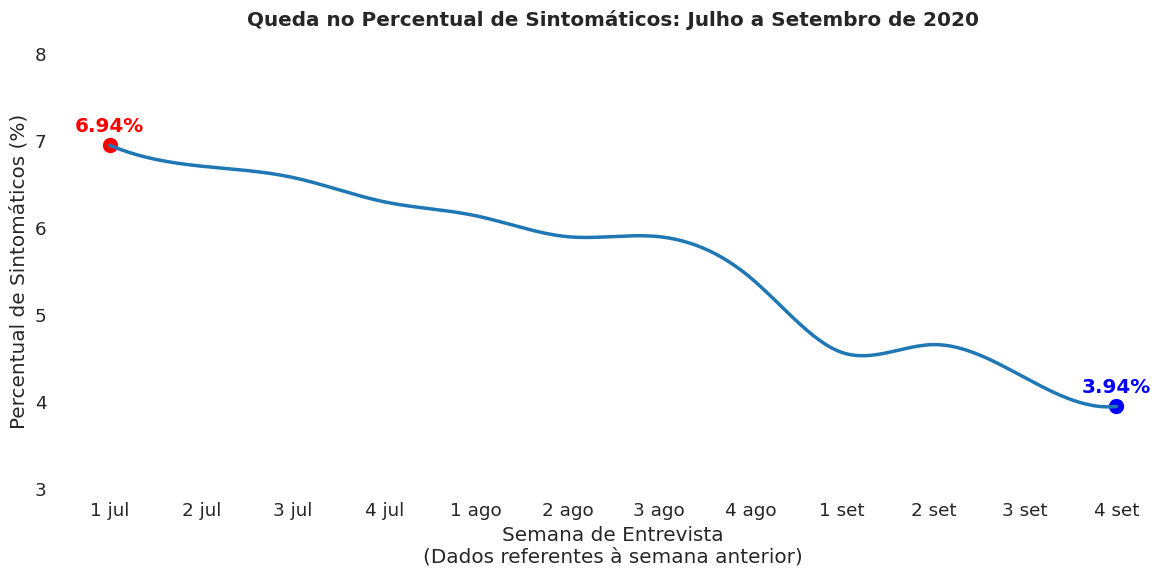

In [26]:
# Converter PySpark DataFrame para Pandas DataFrame
df = sintomas_por_semana.toPandas()

# Função para suavizar linhas
from scipy.interpolate import make_interp_spline
import numpy as np
import matplotlib.pyplot as plt

def suavizar_linha(x, y, num_pontos=300):
    """Função para suavizar a linha com interpolação."""
    x_suave = np.linspace(x.min(), x.max(), num_pontos)
    spline = make_interp_spline(x, y, k=3)  # Interpolação cúbica
    y_suave = spline(x_suave)
    return x_suave, y_suave

# Preparar os dados para suavização
x = np.arange(len(df["semana_mes"]))  # Criar eixo X como numérico
y = df["percentual_sintomaticos"]     # Eixo Y com os percentuais
x_suave, y_suave = suavizar_linha(x, y)  # Gerar linha suavizada

# Criar a figura e os eixos
fig, ax = plt.subplots()

# Gráfico principal (linha suavizada)
ax.plot(
    x_suave, y_suave,
    color='#1f77b4', linewidth=2.5  # Linha mais grossa
)

# Destacar o primeiro ponto (1 jul)
ax.scatter(
    x[0], y.iloc[0],
    color='red', s=100
)
ax.annotate(
    f"{y.iloc[0]:.2f}%",  # Duas casas decimais
    xy=(x[0], y.iloc[0]),
    xytext=(0, 10), textcoords="offset points", ha='center',
    color='red', fontweight='bold'
)

# Destacar o menor ponto (4 set)
ax.scatter(
    x[-1], y.iloc[-1],
    color='blue', s=100
)
ax.annotate(
    f"{y.iloc[-1]:.2f}%",  # Duas casas decimais
    xy=(x[-1], y.iloc[-1]),
    xytext=(0, 10), textcoords="offset points", ha='center',
    color='blue', fontweight='bold'
)

# Configurar o eixo X com os rótulos de semana_mes
ax.set_xticks(x)
ax.set_xticklabels(df["semana_mes"], rotation=0)

# Títulos e Rótulos
ax.set_title("Queda no Percentual de Sintomáticos: Julho a Setembro de 2020", pad=20, fontweight='bold')
ax.set_xlabel("Semana de Entrevista\n(Dados referentes à semana anterior)")
ax.set_ylabel("Percentual de Sintomáticos (%)")

# Ajustar os limites do eixo Y
ax.set_ylim(3, 8)

# Remover todas as bordas
for spine in ax.spines.values():
    spine.set_visible(False)

# Ajuste final
plt.tight_layout()

# Mostrar o gráfico
plt.show()


O gráfico revela uma **queda consistente** no percentual de sintomáticos, passando de **6,94%** na primeira semana de julho para **3,94%** na última semana de setembro de 2020. Essa redução acompanha um período em que **medidas de contenção**, como o uso obrigatório de máscaras e o distanciamento social, estavam amplamente adotadas no Brasil. Ressaltamos que a **PNAD COVID-19** se destaca por sua metodologia robusta: os entrevistadores entravam em contato **mensalmente, por telefone**, com domicílios selecionados e coletavam informações sobre **todos os integrantes da casa**, garantindo uma visão **precisa e contínua** dos sintomas apresentados pela população.

Como a **vacinação contra a COVID-19** no Brasil teve início apenas em **17 de janeiro de 2021** [¹], a **PNAD COVID-19** desempenhou um papel fundamental durante o período mais crítico da pandemia em **2020**. O monitoramento frequente dos sintomas permitiu acompanhar a **evolução da pandemia em tempo real**, fornecendo dados essenciais para embasar políticas públicas e medidas de controle. A pesquisa trouxe um **panorama confiável** sobre a incidência de sintomas, mesmo em um cenário sem vacina, ajudando a compreender a **redução de casos sintomáticos** ao longo dos meses analisados.


**Referência**  
[¹] **Fio Cruz ** - [Vacinação contra a Covid-19 no Brasil completa um ano](https://portal.fiocruz.br/noticia/vacinacao-contra-covid-19-no-brasil-completa-um-ano) - Consultado em 02/12/2024

#### Evolução Temporal dos Três Sintomas Mais Frequentes


##### Data Frame - Evolução Temporal dos Três Sintomas Mais Frequentes

In [27]:
from pyspark.sql import functions as F
from pyspark.sql.window import Window

# Listar os sintomas para agregar
sintomas = ["febre", "tosse", "dor_garganta", "dificuldade_respirar",
            "dor_cabeca", "dor_peito", "nausea", "nariz_entupido",
            "fadiga", "dor_olhos", "perda_cheiro_sabor", "dor_muscular", "diarreia"]

# Função para contar sintomas
def contar_sintomas(sintoma):
    return F.count(F.when(F.col(sintoma) == "Sim", 1)).alias(f"total_{sintoma}")

# Agregar dados com base na coluna 'semana_mes'
sintomas_por_semana = (
    pnad_covid_7a9_2020_ord
    .groupBy("semana_mes")
    .agg(
        *[contar_sintomas(sintoma) for sintoma in sintomas],
        F.count("*").alias("total_entrevistados")
    )
)

# Calcular o percentual de cada sintoma
for sintoma in sintomas:
    sintomas_por_semana = sintomas_por_semana.withColumn(
        f"percentual_{sintoma}",
        F.round((F.col(f"total_{sintoma}") / F.col("total_entrevistados") * 100), 2)
    )

# Explodir as colunas de percentual e seus nomes em linhas
percentual_cols = [f"percentual_{sintoma}" for sintoma in sintomas]
exploded = sintomas_por_semana.select(
    "semana_mes",
    F.explode(F.array(*[F.struct(F.col(col).alias("percentual"), F.lit(col).alias("name")) for col in percentual_cols])).alias("exploded")
).select("semana_mes", "exploded.percentual", "exploded.name")

# Calcular os três maiores percentuais para cada semana
window_spec = Window.partitionBy("semana_mes").orderBy(F.col("percentual").desc())
sintomas_melhores = (
    exploded
    .withColumn("rank", F.row_number().over(window_spec))
    .filter(F.col("rank") <= 3)
)

# Contar a frequência de cada sintoma entre os três maiores percentuais em todas as semanas
frequencia_sintomas = (
    sintomas_melhores
    .groupBy("name")
    .count()
    .orderBy(F.col("count").desc())
)

# Identificar os três sintomas mais frequentes
top_3_sintomas = frequencia_sintomas.limit(3).select("name").rdd.flatMap(lambda x: x).collect()

# Criar um novo DataFrame com apenas os três sintomas mais frequentes
colunas_top_3 = ["semana_mes", "total_entrevistados"] + top_3_sintomas
sintomas_top_3 = sintomas_por_semana.select(*colunas_top_3)

sintomas_top_3.show(truncate=False)

+----------+-------------------+---------------------+-------------------------+----------------+
|semana_mes|total_entrevistados|percentual_dor_cabeca|percentual_nariz_entupido|percentual_tosse|
+----------+-------------------+---------------------+-------------------------+----------------+
|3 ago     |96635              |2.48                 |2.36                     |2.0             |
|1 ago     |95374              |2.72                 |2.32                     |2.14            |
|2 ago     |97346              |2.63                 |2.23                     |2.11            |
|4 set     |97306              |1.72                 |1.37                     |1.23            |
|3 jul     |96633              |3.01                 |2.38                     |2.22            |
|3 set     |97169              |1.77                 |1.54                     |1.46            |
|4 jul     |97051              |2.78                 |2.38                     |2.21            |
|4 ago     |97165   

##### Gráfico - Evolução Temporal dos Três Sintomas Mais Frequentes

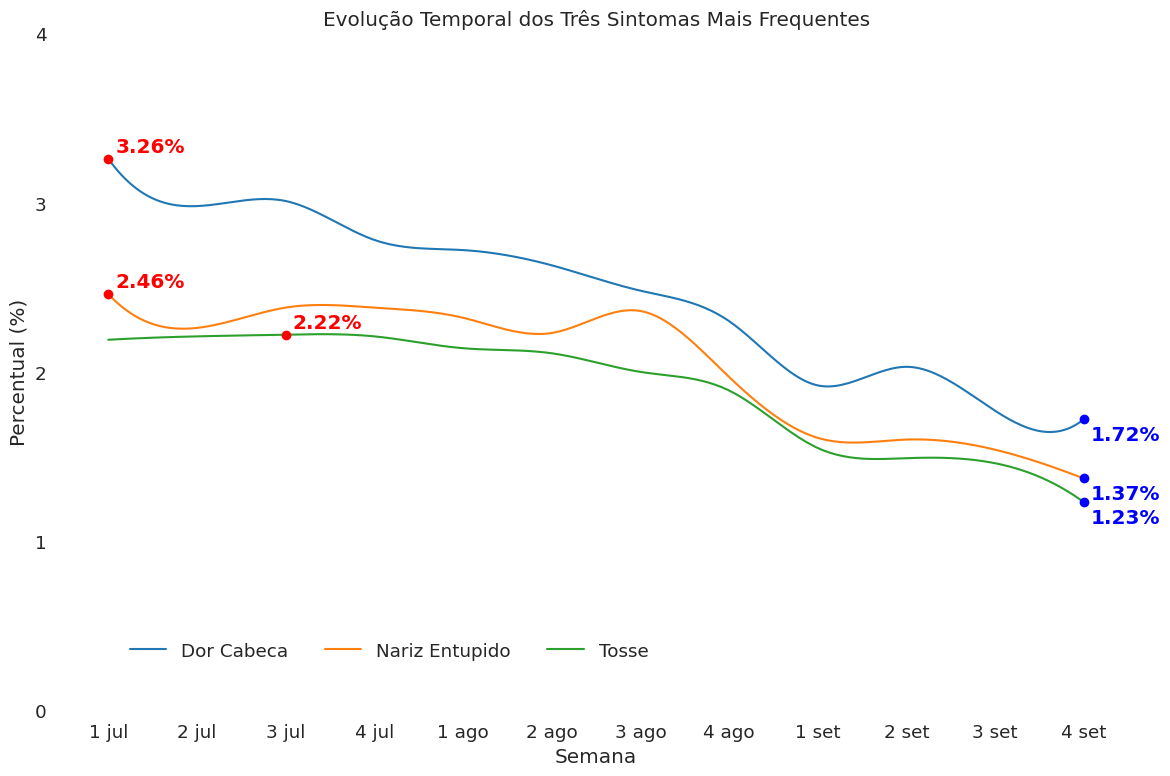

In [28]:
# Supondo que sintomas_top_3 esteja definido e tenha as colunas necessárias
# Criar colunas auxiliares diretamente no DataFrame principal
sintomas_top_3 = sintomas_top_3.withColumn(
    "ordem_semana",
    F.expr("CASE WHEN semana_mes LIKE '1 %' THEN 1 " +
           "WHEN semana_mes LIKE '2 %' THEN 2 " +
           "WHEN semana_mes LIKE '3 %' THEN 3 " +
           "WHEN semana_mes LIKE '4 %' THEN 4 ELSE 0 END")
).withColumn(
    "mes_num",
    F.expr("CASE WHEN semana_mes LIKE '%jul' THEN 7 " +
           "WHEN semana_mes LIKE '%ago' THEN 8 " +
           "WHEN semana_mes LIKE '%set' THEN 9 ELSE 0 END")
)

# Selecionar as colunas principais
sintomas_principais = sintomas_top_3.select(
    "semana_mes", "mes_num", "ordem_semana", "total_entrevistados",
    *[col for col in sintomas_top_3.columns if col.startswith('percentual_')]
)

# Converter para Pandas para plotagem
df_sintomas = sintomas_principais.orderBy(["mes_num", "ordem_semana"]).toPandas()

# Função para suavizar a linha
def suavizar_linha(x, y, pontos=300):
    x_suave = np.linspace(x.min(), x.max(), pontos)
    spl = make_interp_spline(x, y, k=3)
    y_suave = spl(x_suave)
    return x_suave, y_suave

# Função para remover todas as bordas
def remover_bordas(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

# Plotagem usando matplotlib
plt.figure(figsize=(12, 8))

# Plotar os três sintomas mais frequentes
for col in df_sintomas.columns[4:]:
    x = np.arange(len(df_sintomas["semana_mes"]))
    y = df_sintomas[col]
    x_suave, y_suave = suavizar_linha(x, y)
    plt.plot(x_suave, y_suave, label=col.replace('percentual_', '').replace('_', ' ').title())

    # Destacar o maior valor
    max_idx = y.idxmax()
    plt.scatter([x[max_idx]], [y[max_idx]], color='red', zorder=5)
    plt.annotate(f"{y[max_idx]}%", xy=(x[max_idx], y[max_idx]), xytext=(5, 5), textcoords='offset points', color='red', fontweight='bold')

    # Destacar o menor valor
    min_idx = y.idxmin()
    plt.scatter([x[min_idx]], [y[min_idx]], color='blue', zorder=5)
    plt.annotate(f"{y[min_idx]}%", xy=(x[min_idx], y[min_idx]), xytext=(5, -15), textcoords='offset points', color='blue', fontweight='bold')

plt.title('Evolução Temporal dos Três Sintomas Mais Frequentes')
plt.xlabel('Semana')
plt.ylabel('Percentual (%)')
# Posiciona a legenda dentro da área do gráfico bbox_to_anchor=(0.05, 0.05), alinhada à esquerda na parte de baixo loc='lower left'
# na horizontal e sem o título ncol=3 e sem o frame frameon=False
plt.legend(loc='lower left', bbox_to_anchor=(0.05, 0.05), ncol=3, frameon=False)
plt.xticks(x, df_sintomas["semana_mes"])
# Valor final dos ticks (maior percentual encontrado + 1) step=1  e  Incremento entre os ticks
plt.yticks(np.arange(0, df_sintomas.iloc[:, 4:].values.max().max() + 1, step=1))
remover_bordas(plt.gca())
plt.grid(False)
plt.tight_layout()
plt.show()

O gráfico acima apresenta a **evolução semanal** do percentual dos três sintomas mais reportados durante o período de **julho a setembro de 2020**, segundo dados coletados na **PNAD COVID-19**. Os sintomas analisados foram **dor de cabeça**, **nariz entupido** e **tosse**, que juntos representam os principais indicadores clínicos relatados na população durante a pandemia de COVID-19.

Todos os três sintomas exibem uma **redução gradual** ao longo das semanas, indicando uma possível diminuição dos casos sintomáticos reportados.A **dor de cabeça** foi o sintoma mais prevalente ao longo de todo o período, atingindo **3.26%** no início de julho e caindo para **1.72%** na última semana de setembro. O **nariz entupido** e a **tosse** apresentaram valores mais baixos, mas igualmente em declínio, finalizando com **1.37%** e **1.23%**, respectivamente.

Inicialmente a epidemia foi impulsionada principalmente pelas linhagens B.1.1.28 e B.1.1.33 SARS-CoV-2 (Severe Acute Respiratory Syndrome Coronavirus 2), que foram as mais prevalentes até outubro de 2020. Os três sintomas mais frequentes são bem característicos destas variantes.

**Fonte:** [Principais variantes do SARS-CoV-2 notificadas no Brasil](https://www.rbac.org.br/artigos/principais-variantes-do-sars-cov-2-notificadas-no-brasil/#:~:text=Consultado%20em%2014%2F07%2F2021.,-VARIANTES%20DE%20PREOCUPA%C3%87%C3%83O&text=A%20variante%20Alfa%20(tamb%C3%A9m%20denominada,que%20foi%20identificada%20no%20Brasil.) Consultado em 05/12/2024.

#### Data Frame - Perfil dos pesquisados na PNAD Covid

Gerar o perfil dos moradores é essencial para compreender quais grupos foram mais impactados pela Covid-19. Considerando a natureza longitudinal do estudo, focamos na análise do mês de agosto como referência para identificar padrões e tendências no perfil dos indivíduos afetados.

In [29]:
from pyspark.sql import functions as F
from pyspark.sql.window import Window

# 1. Filtrar registros do mês de agosto
agosto_total = pnad_covid_7a9_2020.filter(F.col("mes") == "ago")

# 2. Criar faixas etárias
def faixa_etaria(idade):
    if idade is None or idade == "":
        return "Ignorado"
    idade = int(idade)
    if idade < 15:
        return "0 a 14 anos"
    elif idade <= 59:
        return "15 a 59 anos"
    else:
        return "60 ou mais"

faixa_etaria_udf = F.udf(faixa_etaria)

# Aplicar a UDF para criar a coluna de faixa etária
agosto_total = agosto_total.withColumn("faixa_idade", faixa_etaria_udf(F.col("idade")))

# 3. Função para calcular valor absoluto e percentual dentro da variável
def calcular_abs_percentual(df, coluna):
    total_por_grupo = df.groupBy(coluna).agg(F.count("*").alias("valor_absoluto"))
    total_por_grupo = total_por_grupo.withColumn(
        "percentual",
        F.round((F.col("valor_absoluto") / F.sum("valor_absoluto").over(Window.partitionBy())) * 100, 2)
    )
    return total_por_grupo.orderBy("valor_absoluto", ascending=False)

# 4. Calcular para as variáveis especificadas
variaveis = ["faixa_idade", "genero", "cor", "escolaridade", "papel_no_domicilio"]
resultados_agosto = {}

for var in variaveis:
    resultados_agosto[var] = calcular_abs_percentual(agosto_total, var)
    print(f"\nResumo para {var} em agosto:")
    resultados_agosto[var].show(truncate=False)


Resumo para faixa_idade em agosto:
+------------+--------------+----------+
|faixa_idade |valor_absoluto|percentual|
+------------+--------------+----------+
|15 a 59 anos|245400        |63.49     |
|0 a 14 anos |74014         |19.15     |
|60 ou mais  |67106         |17.36     |
+------------+--------------+----------+


Resumo para genero em agosto:
+------+--------------+----------+
|genero|valor_absoluto|percentual|
+------+--------------+----------+
|Mulher|200960        |51.99     |
|Homem |185560        |48.01     |
+------+--------------+----------+


Resumo para cor em agosto:
+--------+--------------+----------+
|cor     |valor_absoluto|percentual|
+--------+--------------+----------+
|Parda   |189288        |48.97     |
|Branca  |161638        |41.82     |
|Preta   |31673         |8.19      |
|Amarela |2321          |0.6       |
|Indígena|1497          |0.39      |
|Ignorado|103           |0.03      |
+--------+--------------+----------+


Resumo para escolaridade em agosto

####  Gráfico - Perfil dos pesquisados na PNAD Covid

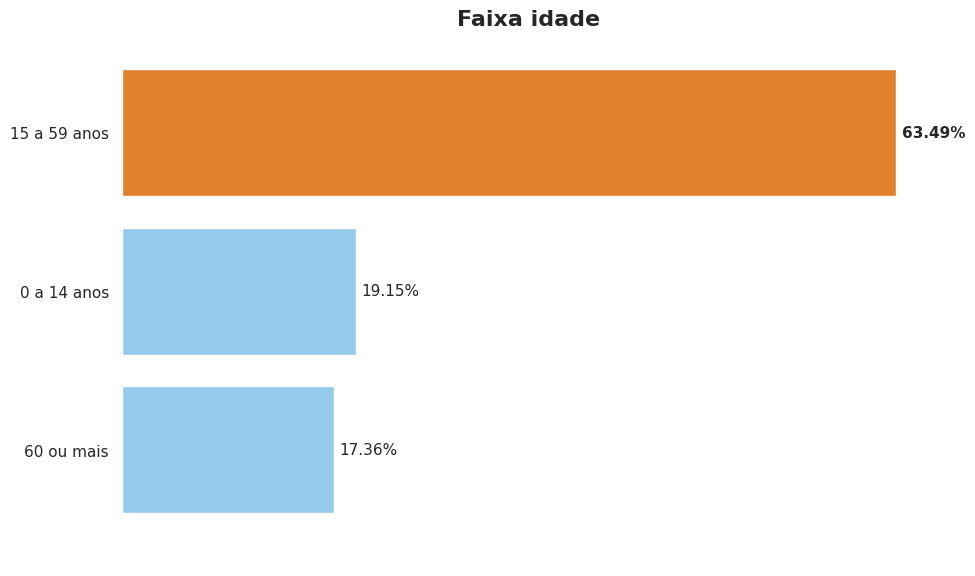

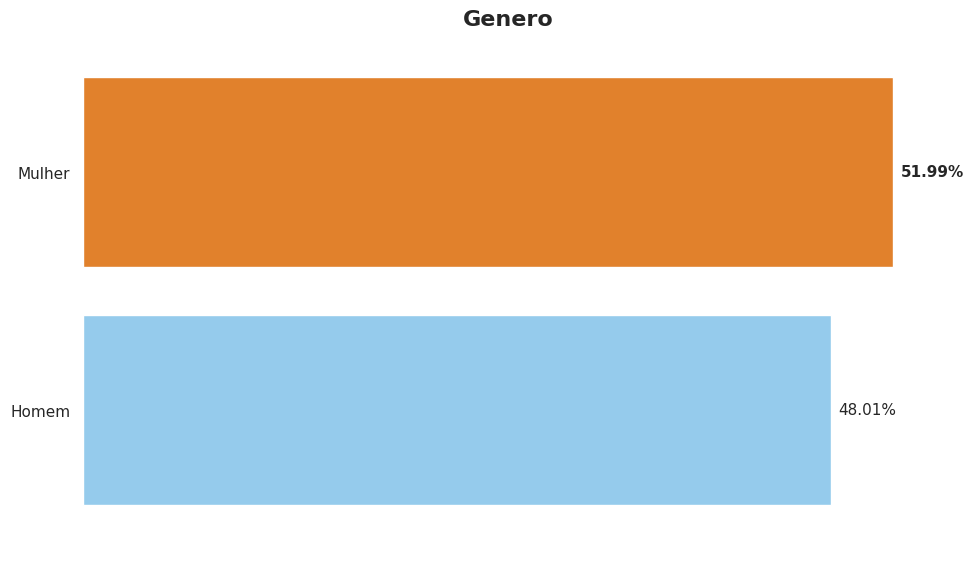

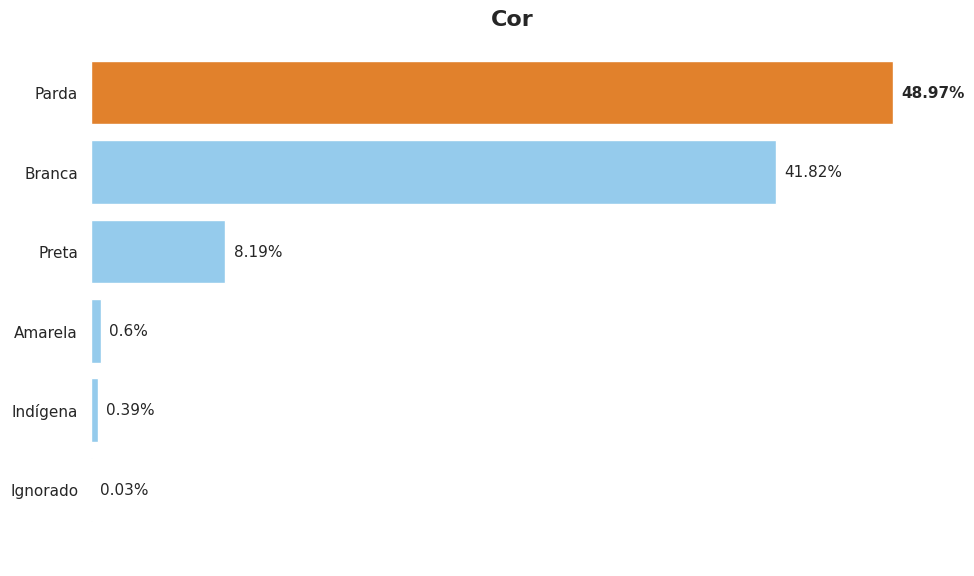

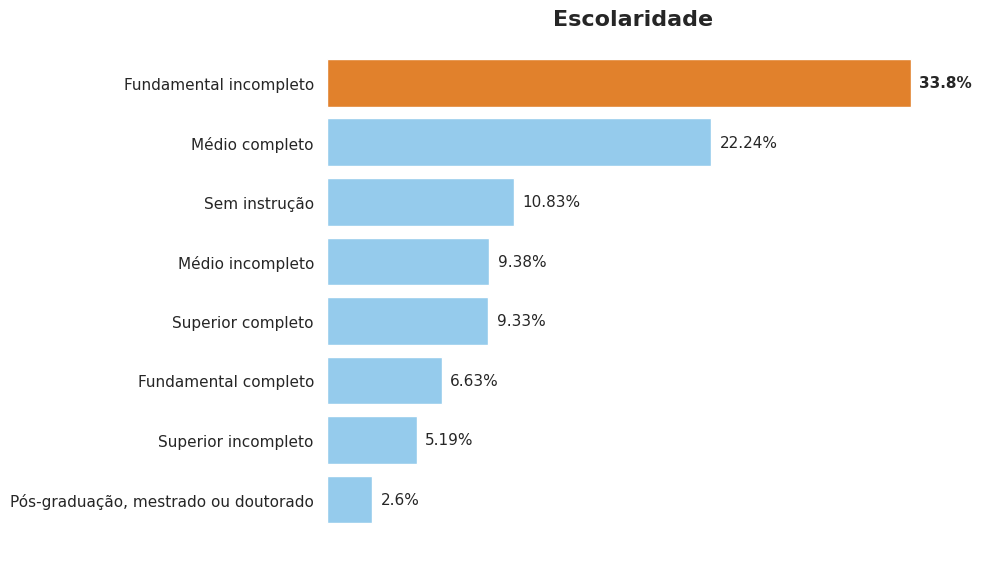

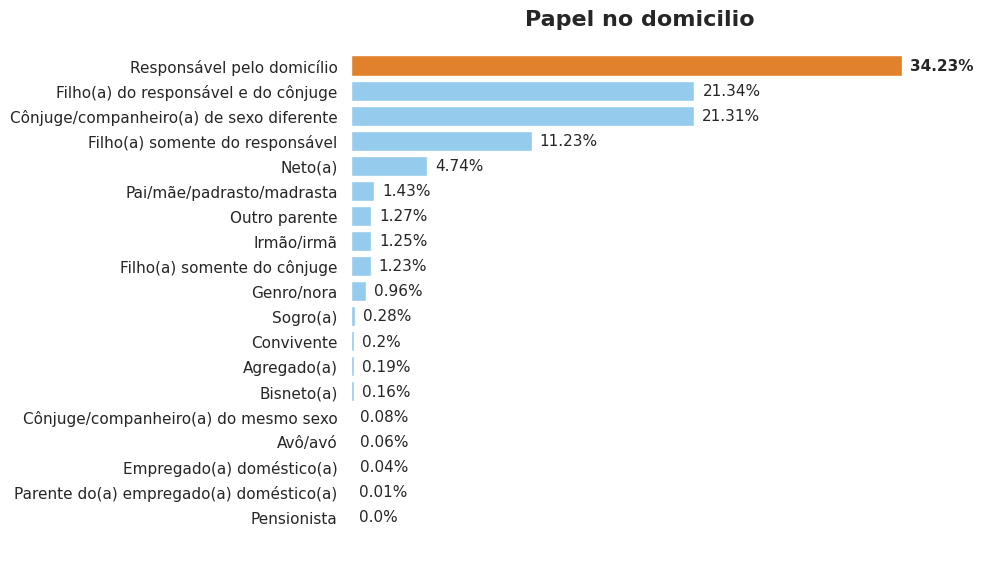

In [30]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ignorar FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Configuração global para gráficos padronizados
sns.set(style="white", context="notebook", font_scale=1.2)
plt.rcParams.update({
    "figure.figsize": (10, 6),  # Tamanho dos gráficos
    "axes.titlesize": 16,
    "axes.labelsize": 12,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "font.family": "DejaVu Sans",
})

# Função para gerar gráficos de barras
def gerar_grafico_barras(df, coluna, titulo, xlabel, ylabel="Percentual (%)"):
    """
    Gera um gráfico de barras destacando o maior valor em laranja, barras menores em azul claro,
    e mostrando os valores ao lado das barras.
    """
    # Converter PySpark DataFrame para Pandas
    pandas_df = df.toPandas()

    # Identificar o índice da barra com maior valor
    max_index = pandas_df["percentual"].idxmax()

    # Definir cores: azul claro para todas as barras, laranja para a de maior valor
    cores = ["#87CEFA"] * len(pandas_df)  # Azul claro para todas as barras
    cores[max_index] = "#FF7F0E"  # Laranja para o destaque

    # Gráfico de barras
    plt.figure()
    sns.barplot(
        x="percentual",
        y=coluna,
        data=pandas_df,
        palette=cores
    )

    # Adicionar rótulos e título
    plt.title(titulo, pad=20, fontweight="bold")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Mostrar valores ao lado das barras
    for index, row in pandas_df.iterrows():
        plt.text(row["percentual"] + 0.5, index, f"{row['percentual']}%",
                 ha="left", va="center", fontsize=11, fontweight="bold" if index == max_index else "normal")

    # Remover valores do eixo x
    plt.gca().set_xticklabels([])  # Esta linha oculta os valores do eixo x

    # Remover todas as bordas do gráfico
    for spine in ["top", "right", "left", "bottom"]:
        plt.gca().spines[spine].set_visible(False)

    # Ajuste final para layout
    plt.tight_layout()
    plt.show()

# Variáveis especificadas para geração dos gráficos
variaveis = ["faixa_idade", "genero", "cor", "escolaridade", "papel_no_domicilio"]

# Gerar gráficos para todas as variáveis
for var, df in resultados_agosto.items():
    titulo = f"{var.replace('_', ' ').capitalize()}"
    ylabel = ""  # Passar string vazia para não mostrar o label de y
    xlabel = " "
    gerar_grafico_barras(df, var, titulo, xlabel, ylabel)

Os dados obtidos pela PNAD Covid-19 tinham como objetivo fornecer informações rápidas e atualizadas sobre a pandemia, utilizando uma metodologia que previa o contato telefônico com domicílios já cadastrados em levantamentos anteriores, como a PNAD Contínua. Essa abordagem garante que o perfil dos entrevistados represente bem a população brasileira, embora alguns desafios, como a exclusão de famílias sem acesso telefônico, possam introduzir pequenas distorções.

De acordo com informações do IBGE, os dados referentes à escolaridade, cor/raça e faixa etária na amostra da PNAD Covid-19 estão alinhados com a distribuição demográfica nacional observada nos levantamentos regulares do instituto. Essa comparação nos dá confiança de que os dados coletados são adequados e representativos para análises comparativas com os infectados.

**Faixa Etária**:
A predominância de 63.49% na faixa 15 a 59 anos reflete o perfil ativo da população, tanto economicamente quanto socialmente. Grupos 0 a 14 anos (19.15%) e 60 anos ou mais (17.36%) aparecem em menor número, o que é consistente com a distribuição populacional brasileira.

**Gênero**:
As mulheres (51.99%) constituem uma leve maioria em comparação aos homens (48.01%), o que é esperado, pois as mulheres representam 51.8% da população brasileira segundo dados do IBGE (2020).

**Cor**:
O grupo Pardo (48.97%) e Branco (41.82%) reflete bem a distribuição nacional, onde os pardos representam cerca de 47% e os brancos cerca de 42.7% da população (PNAD Contínua 2019). O menor percentual de Pretos (8.19%), Amarelos (0.6%) e Indígenas (0.39%) é consistente com a estrutura demográfica nacional, embora destaque a necessidade de atenção às vulnerabilidades desses grupos.

**Escolaridade**:
A predominância de indivíduos com Fundamental incompleto (33.8%) e Médio completo (22.24%) evidencia a prevalência de níveis de escolaridade básicos e médios entre os brasileiros, o que também está em linha com os resultados anteriores da PNAD.

**Papel no Domicílio**:
Os Responsáveis pelo domicílio (34.23%) são o grupo predominante, seguidos por Filhos do responsável e do cônjuge (21.34%) e Cônjuges (21.31%). Isso reforça que a pesquisa abrange todos os moradores do domicílio, independentemente de sua posição na estrutura familiar.



#### Data Frame Qual o perfil dos pesquisados que tiveram sintoma pelo menos uma vez durante julho a setembro?

In [32]:
from pyspark.sql import functions as F
from pyspark.sql.window import Window

# 1. Filtrar registros com e sem sintomas
com_sintoma = pnad_covid_7a9_2020.filter(F.col("teve_sintoma") == "Sim")
sem_sintoma = pnad_covid_7a9_2020.filter(F.col("teve_sintoma") == "Não")

# 2. Criar faixas etárias
def faixa_etaria(idade):
    if idade is None or idade == "":
        return "Ignorado"
    idade = int(idade)
    if idade <= 14:
        return "0 a 14 anos"
    elif idade <= 59:
        return "15 a 59 anos"
    else:
        return "60 ou mais"

faixa_etaria_udf = F.udf(faixa_etaria, StringType())

# Aplicar a UDF para criar a coluna de faixa etária
pnad_covid_7a9_2020 = pnad_covid_7a9_2020.withColumn("faixa_idade", faixa_etaria_udf(F.col("idade")))

# 3. Função para calcular valor absoluto e percentual dentro da variável
def calcular_abs_percentual(df_total, com_sintoma, coluna):
    # Verificar se a coluna existe no DataFrame
    if coluna not in df_total.columns:
        raise ValueError(f"A coluna '{coluna}' não existe no DataFrame.")

    # Calcular valor absoluto para quem teve sintoma
    total_por_grupo_com_sintoma = com_sintoma.groupBy(coluna).agg(F.count("*").alias("valor_absoluto"))

    # Calcular total de registros por grupo
    total_por_grupo_total = df_total.groupBy(coluna).agg(F.count("*").alias("total"))

    # Unir ambos os DataFrames
    resultado = total_por_grupo_com_sintoma.join(total_por_grupo_total, coluna, "inner")

    # Calcular percentual
    resultado = resultado.withColumn(
        "percentual",
        F.round((F.col("valor_absoluto") / F.col("total")) * 100, 2)
    )

    return resultado.orderBy("valor_absoluto", ascending=False)

# 4. Calcular para as variáveis especificadas
variaveis = ["faixa_idade", "genero", "cor", "escolaridade", "papel_no_domicilio"]
resultados = {}

for var in variaveis:
    try:
        resultados[var] = calcular_abs_percentual(pnad_covid_7a9_2020, com_sintoma, var)
        print(f"\nResumo para {var}:")
        resultados[var].show(truncate=False)
    except ValueError as e:
        print(e)


Resumo para faixa_idade:
+------------+--------------+------+----------+
|faixa_idade |valor_absoluto|total |percentual|
+------------+--------------+------+----------+
|15 a 59 anos|44204         |735616|6.01      |
|60 ou mais  |12850         |201015|6.39      |
|0 a 14 anos |7792          |221353|3.52      |
+------------+--------------+------+----------+


Resumo para genero:
+------+--------------+------+----------+
|genero|valor_absoluto|total |percentual|
+------+--------------+------+----------+
|Mulher|37615         |602248|6.25      |
|Homem |27231         |555736|4.9       |
+------+--------------+------+----------+


Resumo para cor:
+--------+--------------+------+----------+
|cor     |valor_absoluto|total |percentual|
+--------+--------------+------+----------+
|Parda   |31688         |567782|5.58      |
|Branca  |26388         |483646|5.46      |
|Preta   |5966          |94811 |6.29      |
|Amarela |437           |7001  |6.24      |
|Indígena|355           |4454  |7.97 

#### Gráfico - Qual o perfil dos pesquisados que tiveram sintoma pelo menos uma vez durante julho a setembro?

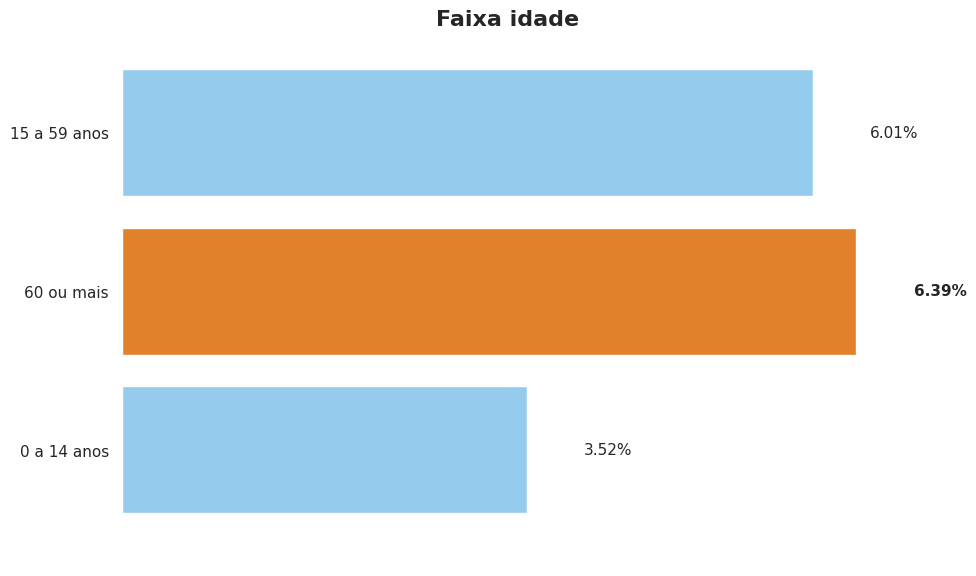

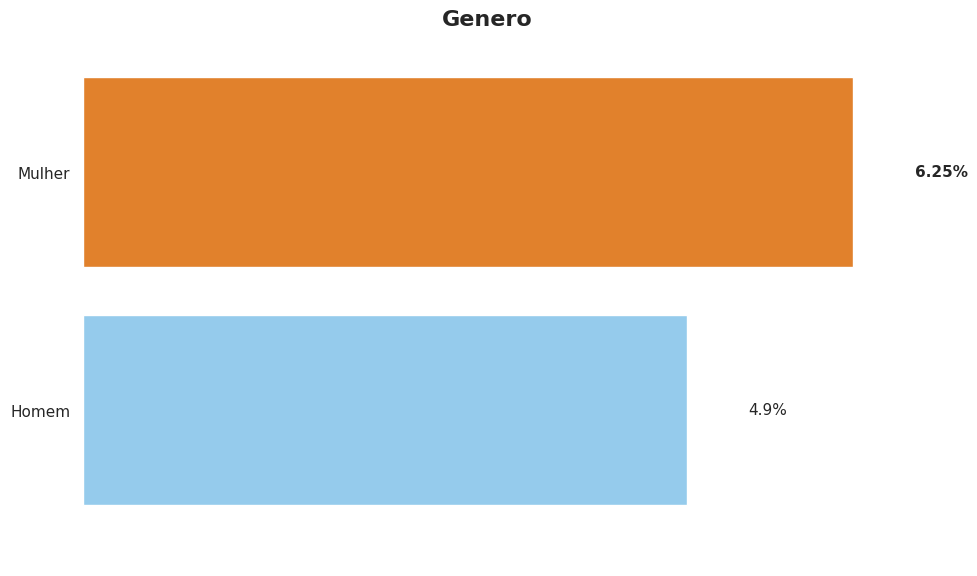

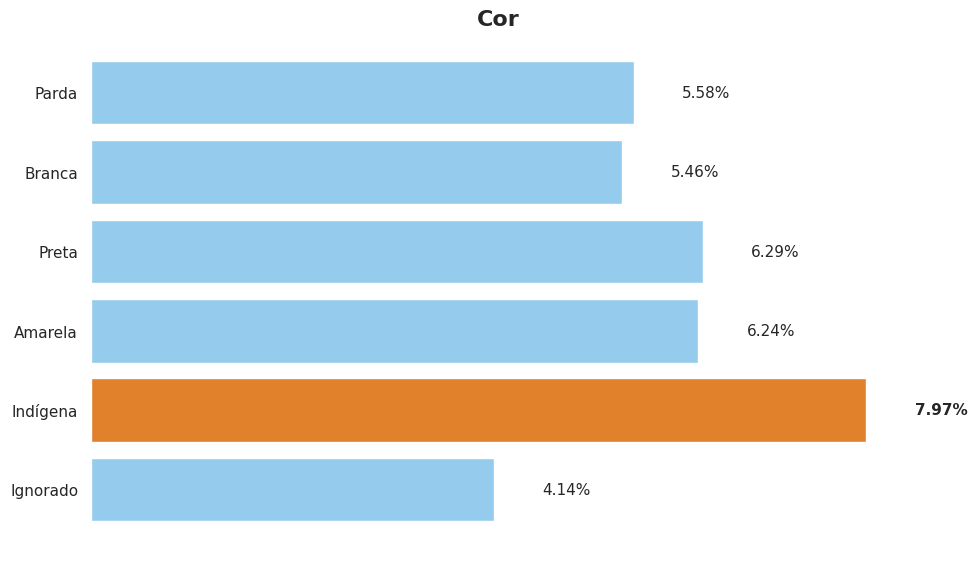

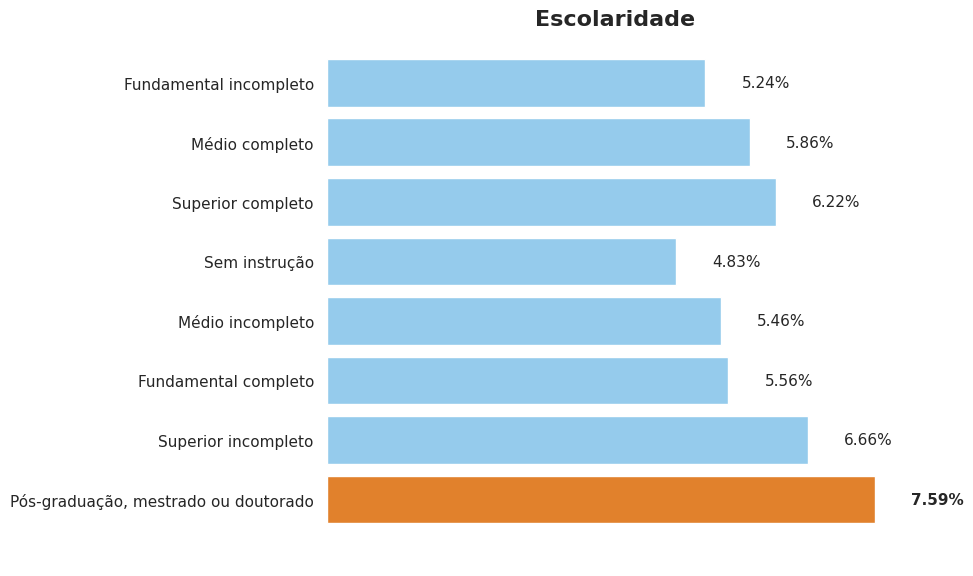

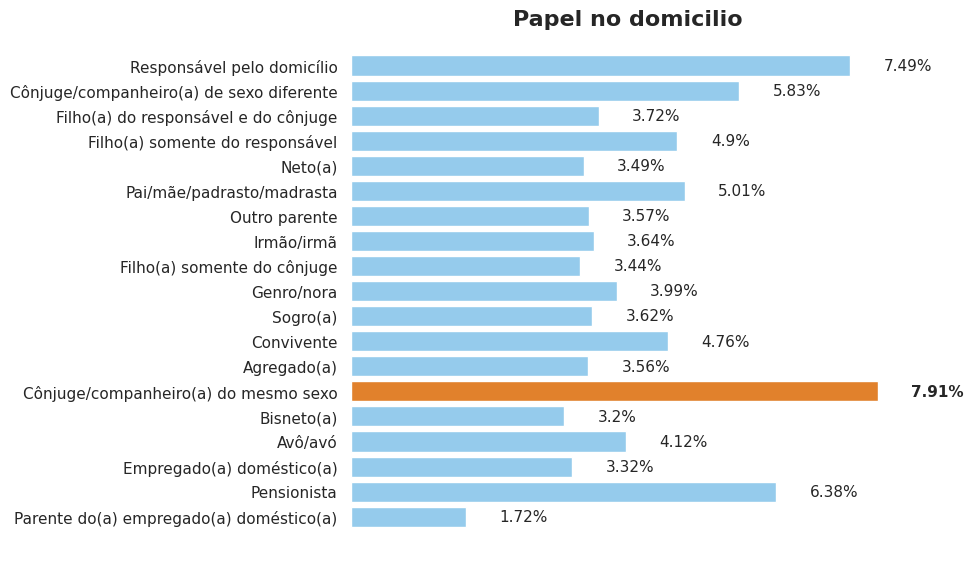

In [33]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# Ignorar FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Configuração global para gráficos padronizados
sns.set(style="white", context="notebook", font_scale=1.2)
plt.rcParams.update({
    "figure.figsize": (10, 6),  # Tamanho dos gráficos
    "axes.titlesize": 16,
    "axes.labelsize": 12,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "font.family": "DejaVu Sans",
})

def gerar_grafico_barras(df, coluna, titulo, xlabel, ylabel="Percentual (%)"):
    """
    Gera um gráfico de barras destacando o maior valor em laranja, barras menores em azul claro,
    e mostrando os valores ao lado das barras.
    """
    # Converter PySpark DataFrame para Pandas
    pandas_df = df.toPandas()

    # Identificar o índice da barra com maior valor
    max_index = pandas_df["percentual"].idxmax()

    # Definir cores: azul claro para todas as barras, laranja para a de maior valor
    cores = ["#87CEFA"] * len(pandas_df)  # Azul claro para todas as barras
    cores[max_index] = "#FF7F0E"  # Laranja para o destaque

    # Gráfico de barras
    plt.figure()
    sns.barplot(
        x="percentual",
        y=coluna,
        data=pandas_df,
        palette=cores
    )

    # Adicionar rótulos e título
    plt.title(titulo, pad=20, fontweight="bold")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Mostrar valores ao lado das barras
    for index, row in pandas_df.iterrows():
        plt.text(row["percentual"] + 0.5, index, f"{row['percentual']}%",
                 ha="left", va="center", fontsize=11, fontweight="bold" if index == max_index else "normal")

    # Remover valores do eixo x
    plt.gca().set_xticklabels([])  # Esta linha oculta os valores do eixo x

    # Remover todas as bordas do gráfico
    for spine in ["top", "right", "left", "bottom"]:
        plt.gca().spines[spine].set_visible(False)

    # Ajuste final para layout
    plt.tight_layout()
    plt.show()

# Gerar gráficos para todas as variáveis
for var, df in resultados.items():
    titulo = f"{var.replace('_', ' ').capitalize()}"
    ylabel = ""  # Passar string vazia para não mostrar o label de y
    xlabel = " "
    gerar_grafico_barras(df, var, titulo, xlabel, ylabel)

No gráfio é possível notar:

**Idosos (60+ anos) e indígenas** apresentaram os maiores percentuais de sintomáticos, indicando maior vulnerabilidade.

**Mulheres** relataram sintomas em proporção mais elevada do que homens.
Grupos raciais historicamente vulneráveis, os **pretos** e os **indígenas**, registraram percentuais acima da média geral, reforçando a necessidade de políticas públicas direcionadas a essas populações. Os **amarelos** também, mas provavelmente por ter mais contato com os países orientais, local de início da pandemia.

Importante destacar que **população indígena possui o maior percentual de sintomáticos (7.97%)**, desproporcional na sua participação na amostra e do perfil populacional no Brasil. Essa situação reflete extrema vulnerabilidade e por isso, este grupo durante a pandemia enfrentou desafios adicionais, como acesso limitado a serviços de saúde, distância, perfil imunológico diferenciado.

### **Comportamento da população na época da COVID-19**


#### Data Frame PNAD_comportamento


In [34]:
from pyspark.sql import functions as F

# Lista de colunas a serem verificadas para criar a variável procurou_atendimento
colunas_atendimento = [
    "visita_profissional_sus", "visita_profissional_particular", "outras_medidas",
    "atend_posto_saude", "atend_pronto_socorro_sus", "atend_hospital_sus",
    "atend_ambulatorio_privado", "atend_pronto_socorro_privado", "atend_hospital_privado"
]

# Criar a condição para verificar se pelo menos uma das colunas tem o valor "Sim" ou 1
condicao_procurou_atendimento = F.lit(False)
for coluna in colunas_atendimento:
    condicao_procurou_atendimento = condicao_procurou_atendimento | \
                                    ((F.col(coluna) == "Sim") | (F.col(coluna) == 1))

# Adicionar a coluna 'procurou_atendimento' ao DataFrame
pnad_comportamento = pnad_covid_7a9_2020.withColumn("procurou_atendimento", condicao_procurou_atendimento)

# Tratar valores null e substituí-los por "Em Branco"
pnad_comportamento = pnad_comportamento.fillna("Em Branco")

# Exibir o DataFrame de comportamento
pnad_comportamento.show(truncate=False)

# Contar quantos "Sim" existem na coluna 'procurou_atendimento'
contagem_sim = pnad_comportamento.filter(F.col("procurou_atendimento") == True).count()

print(f"Total de pessoas que procuraram atendimento: {contagem_sim}")



+---+---+------------------+--------------------+----------------------------------------+-----+------+-------+----------------------+----------------+--------------------------------------+----------------+-------------------------+-----+-----+------------+--------------------+----------+---------+------+--------------+------+---------+------------------+------------+--------+---------------+-------------+------------------+---------------------+-------------------------+-----------------------+------------------------------+--------------+-----------------+------------------------+------------------+-------------------------+----------------------------+----------------------+---------------+-----------------------+------------------+---------------------+---------------------+--------------+----------------------+-------------------+-----------------------+--------------------+--------+-----------+--------------+---------------+---------+------+--------------------------------------

####Data Frame - A escolaridade influênciou na busca por atendimento quando teve algum sintoma?

In [35]:
from pyspark.sql import functions as F

# Filtrar os dados para pessoas com sintomas
sintoma_df = pnad_comportamento.filter(F.col("teve_sintoma") == "Sim")

# Contagem total de pessoas com sintomas por escolaridade
total_sintoma_df = sintoma_df.groupBy("escolaridade").agg(F.count("*").alias("total_sintoma"))

# Filtrar pessoas que procuraram atendimento e tiveram sintomas
atendimento_sintoma_df = sintoma_df.filter(F.col("procurou_atendimento") == True) \
                                   .groupBy("escolaridade").agg(F.count("*").alias("atendimento_sintoma"))

# Juntar os DataFrames e calcular a proporção
proporcao_df = atendimento_sintoma_df.join(total_sintoma_df, "escolaridade") \
    .withColumn("proporcao", (F.col("atendimento_sintoma") / F.col("total_sintoma")) * 100)

# Converter para Pandas DataFrame e ordenar
proporcao_pandas_df = proporcao_df.select("escolaridade", "proporcao").toPandas()
proporcao_pandas_df = proporcao_pandas_df.sort_values(by="proporcao", ascending=False)
proporcao_pandas_df.head(10)

,escolaridade,proporcao
6,Sem instrução,30.323115
3,Médio completo,28.535504
5,Superior completo,27.589789
1,Superior incompleto,27.356608
7,Médio incompleto,26.962688
2,Fundamental incompleto,25.527344
4,Fundamental completo,24.882739
0,"Pós-graduação, mestrado ou doutorado",24.288840


#### Gráfico - A escolaridade influênciou na busca por atendimento quando teve algum sintoma?

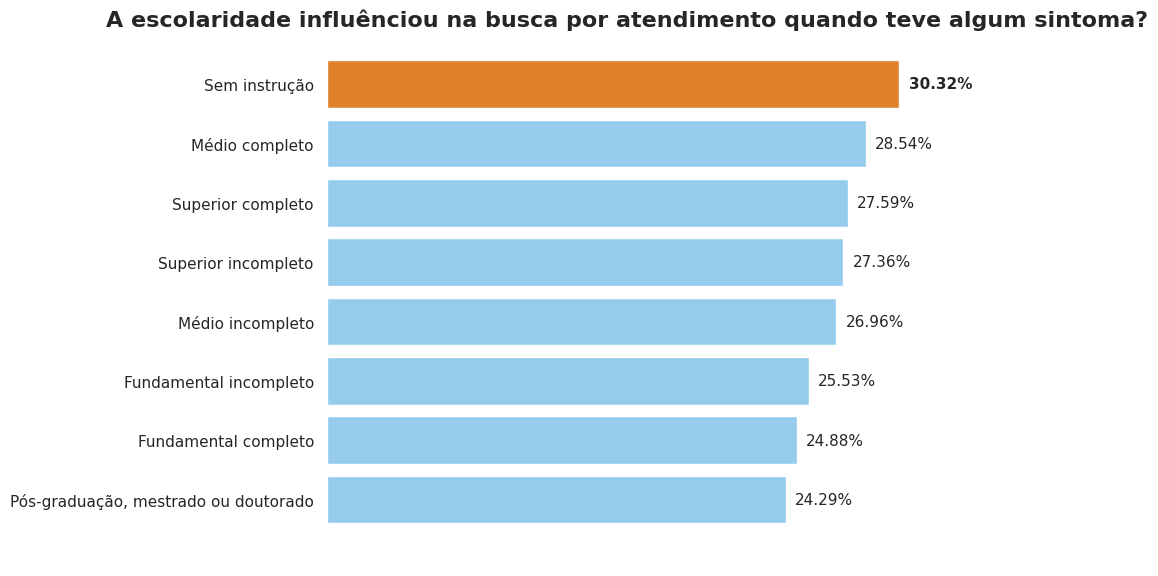

In [36]:
# Ignorar FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Configuração global para gráficos padronizados
sns.set(style="white", context="notebook", font_scale=1.2)
plt.rcParams.update({
    "figure.figsize": (10, 6),  # Tamanho dos gráficos
    "axes.titlesize": 16,
    "axes.labelsize": 12,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "font.family": "DejaVu Sans",
})

# Criar o DataFrame com os dados fornecidos
data = {
    "escolaridade": [
        "Sem instrução", "Médio completo", "Superior completo",
        "Superior incompleto", "Médio incompleto",
        "Fundamental incompleto", "Fundamental completo",
        "Pós-graduação, mestrado ou doutorado"
    ],
    "proporcao": [30.323115, 28.535504, 27.589789, 27.356608,
                  26.962688, 25.527344, 24.882739, 24.288840]
}

df = pd.DataFrame(data)

# Função para gerar gráfico de barras
def gerar_grafico_barras(df, coluna, titulo, xlabel):
    """
    Gera um gráfico de barras destacando o maior valor em laranja, barras menores em azul claro,
    e mostrando os valores ao lado das barras.
    """
    # Identificar o índice da barra com maior valor
    max_index = df["proporcao"].idxmax()

    # Definir cores: azul claro para todas as barras, laranja para a de maior valor
    cores = ["#87CEFA"] * len(df)  # Azul claro para todas as barras
    cores[max_index] = "#FF7F0E"  # Laranja para o destaque

    # Gráfico de barras
    plt.figure()
    sns.barplot(
        x="proporcao",
        y=coluna,
        data=df,
        palette=cores
    )

    # Adicionar rótulos e título
    plt.title(titulo, pad=20, fontweight="bold")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Mostrar valores ao lado das barras
    for index, row in df.iterrows():
        plt.text(row["proporcao"] + 0.5, index, f"{row['proporcao']:.2f}%",
                 ha="left", va="center", fontsize=11, fontweight="bold" if index == max_index else "normal")

    # Remover valores do eixo x
    plt.gca().set_xticklabels([])  # Oculta os valores do eixo x

    # Remover todas as bordas do gráfico
    for spine in ["top", "right", "left", "bottom"]:
        plt.gca().spines[spine].set_visible(False)

    # Ajuste final para layout
    plt.tight_layout()
    plt.show()

# Gerar o gráfico para escolaridade
gerar_grafico_barras(df, "escolaridade", "A escolaridade influênciou na busca por atendimento quando teve algum sintoma?", " ")


O gráfico mostra que a busca por atendimento médico quando há algum sintoma foi baixa em todos os níveis de escolaridade, com percentuais variando entre 24,29% e 30,32%. O grupo **"Sem instrução"** apresentou a maior proporção, com **30,32%**, destacando-se em relação aos demais níveis educacionais. Por outro lado, o menor percentual foi observado entre aqueles com **"Pós-graduação, mestrado ou doutorado"**, que registraram **24,29%**. As diferenças entre os grupos são pequenas, o que sugere que a escolaridade tem um impacto limitado no comportamento de procurar atendimento médico diante de sintomas.

No geral, a proximidade entre os valores indica que as variações podem não ser estatisticamente significativas, com exceção do grupo **"Sem instrução"**, que apresenta um leve destaque. Essa tendência pode indicar que a falta de instrução formal está associada a uma busca mais frequente por atendimento médico, mas, de maneira geral, o comportamento de procura foi baixo em todos os níveis de escolaridade analisados. Para confirmar a relevância das diferenças observadas, seria interessante aplicar **testes estatísticos**, como o **Qui-quadrado**, para avaliar se há associação significativa entre nível de escolaridade e busca por atendimento.


#### Data Frame - Dos que usaram ventilação mecânica quantos tinham plano de saúde?

In [37]:
from pyspark.sql import functions as F

# Filtrar os dados para obter apenas aqueles que usaram ventilação mecânica
ventilacao_df = pnad_comportamento.filter(F.col("uso_ventilacao_mecanica") == "Sim")

# Calcular a contagem total de pessoas que usaram ventilação mecânica
total_ventilacao = ventilacao_df.count()

# Calcular a contagem de pessoas que usaram ventilação mecânica por plano de saúde
ventilacao_plano_df = ventilacao_df.groupBy("possui_plano_saude").agg(F.count("*").alias("frequencia"))

# Calcular a proporção (percentual) de cada grupo em relação ao total de pessoas que usaram ventilação mecânica
proporcao_df = ventilacao_plano_df.withColumn("percentual", (F.col("frequencia") / total_ventilacao) * 100)

# Converter para Pandas DataFrame
proporcao_pandas_df = proporcao_df.select("possui_plano_saude", "percentual").toPandas()

# Exibir o DataFrame resultante
proporcao_pandas_df

,possui_plano_saude,percentual
0,Ignorado,0.561798
1,Não,70.224719
2,Sim,29.213483


#### Gráfico - Dos que usaram ventilação mecânica quantos tinham plano de saúde?

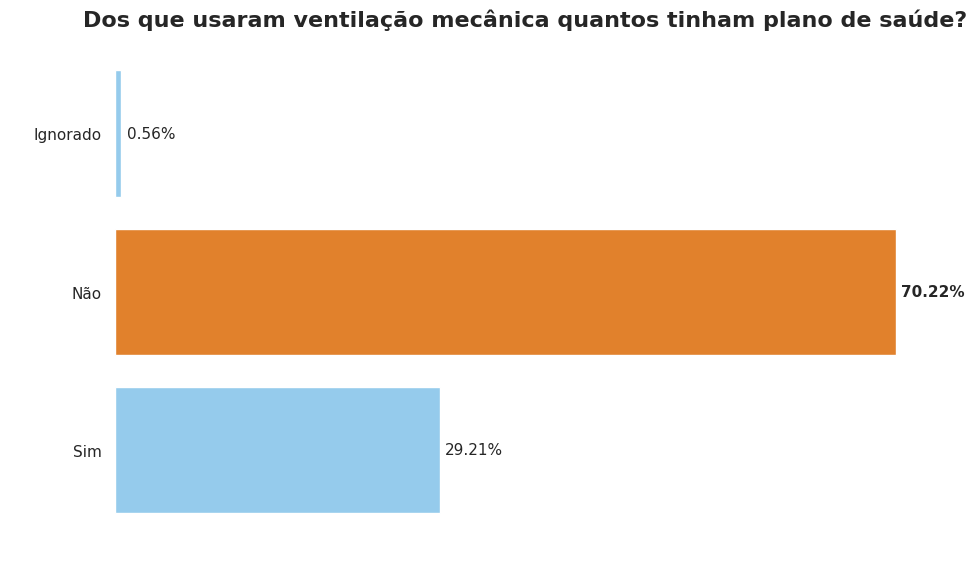

In [38]:
import pandas as pd

# Ignorar FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Configuração global para gráficos padronizados
sns.set(style="white", context="notebook", font_scale=1.2)
plt.rcParams.update({
    "figure.figsize": (10, 6),  # Tamanho dos gráficos
    "axes.titlesize": 16,
    "axes.labelsize": 12,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "font.family": "DejaVu Sans",
})

# Função para gerar gráfico de barras
def gerar_grafico_barras(df, coluna, titulo, xlabel, ylabel):
    """
    Gera um gráfico de barras destacando o maior valor em laranja, barras menores em azul claro,
    e mostrando os valores ao lado das barras.
    """
    # Identificar o índice da barra com maior valor
    max_index = df["percentual"].idxmax()

    # Definir cores: azul claro para todas as barras, laranja para a de maior valor
    cores = ["#87CEFA"] * len(df)  # Azul claro para todas as barras
    cores[max_index] = "#FF7F0E"  # Laranja para o destaque

    # Gráfico de barras
    plt.figure()
    sns.barplot(
        x="percentual",
        y=coluna,
        data=df,
        palette=cores
    )

    # Adicionar rótulos e título
    plt.title(titulo, pad=20, fontweight="bold")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Mostrar valores ao lado das barras
    for index, row in df.iterrows():
        plt.text(row["percentual"] + 0.5, index, f"{row['percentual']:.2f}%",
                 ha="left", va="center", fontsize=11, fontweight="bold" if index == max_index else "normal")

    # Remover valores do eixo x
    plt.gca().set_xticklabels([])  # Oculta os valores do eixo x

    # Remover todas as bordas do gráfico
    for spine in ["top", "right", "left", "bottom"]:
        plt.gca().spines[spine].set_visible(False)

    # Ajuste final para layout
    plt.tight_layout()
    plt.show()

# Gerar o gráfico para plano de saúde
gerar_grafico_barras(proporcao_pandas_df, "possui_plano_saude", "Dos que usaram ventilação mecânica quantos tinham plano de saúde?", " ", " ")

O gráfico mostra que **29,21%** das pessoas que utilizaram ventilação mecânica possuíam plano de saúde, enquanto **70,22%** não tinham. De acordo com dados da Agência Nacional de Saúde Suplementar (ANS), aproximadamente **25%** da população brasileira possui plano de saúde.

A semelhança entre esses percentuais sugere que a distribuição do uso de ventilação mecânica entre pessoas com e sem plano de saúde reflete, de certa forma, a proporção geral da população que possui ou não cobertura de saúde privada. Para confirmar se a diferença de 4% no uso de ventilação mecânica e o número de brasileiros com plano de saude é estatisticamente significativa, seria importante aplicar testes estatísticos, oara avaliar a associação entre a posse de plano de saúde e maior acesso a ventilação mecânica.

**Fonte:** Agência Nacional de Saúde Suplementar (ANS) - [O Tempo](https://www.otempo.com.br/economia/cerca-de-1-4-da-populacao-brasileira-tem-plano-de-saude-diz-ans).



### **Características econômicas da população na época da COVID-19**


##### Data Frame PAND_trab_econ

In [39]:
from pyspark.sql import functions as F

# Colunas para características de trabalho e econômicas, incluindo mês e semana do mês
trabalho_economico_cols = [
    "UF","genero", "idade", "cor", "escolaridade", "papel_no_domicilio",
    "mes", "semana_mes",
    "tipo_trab", "area_trab", "vinculo_emprego", "cargo_funcao",
    "atividade_empresa", "num_empregados", "horas_normais", "horas_trab_real",
    'total_rend'
]

# Filtrar o DataFrame original para manter apenas as colunas de trabalho e econômicas
pnad_trab_econ = pnad_covid_7a9_2020.select(trabalho_economico_cols)

# Exibir o DataFrame de trabalho e características econômicas
pnad_trab_econ.show(truncate=False)

+---+------+-----+-------+----------------------+----------------------------------------+---+----------+-----------------------+---------+-----------------+---------------------------------------------------------------------------------------+------------------------------------------------+--------------+-------------+---------------+----------+
|UF |genero|idade|cor    |escolaridade          |papel_no_domicilio                      |mes|semana_mes|tipo_trab              |area_trab|vinculo_emprego  |cargo_funcao                                                                           |atividade_empresa                               |num_empregados|horas_normais|horas_trab_real|total_rend|
+---+------+-----+-------+----------------------+----------------------------------------+---+----------+-----------------------+---------+-----------------+---------------------------------------------------------------------------------------+------------------------------------------------+----

In [40]:
from pyspark.sql import functions as F

# 1. Filtrar registros do mês de agosto
agosto_df = pnad_trab_econ.filter(F.col("mes") == "ago")

# Verificar se há registros de agosto
if agosto_df.count() == 0:
    print("Não há registros para o mês de agosto.")
else:
    # 2. Calcular o total de registros em agosto
    total_agosto = agosto_df.count()

    # 3. Função para calcular o percentual de registros para cada variável
    def calcular_percentual(df, coluna, total):
        # Agrupar por variável e contar os registros
        contagem_por_coluna = df.groupBy(coluna).agg(F.count("*").alias("contagem"))

        # Calcular o percentual
        percentual_df = contagem_por_coluna.withColumn("percentual", (F.col("contagem") / total) * 100)

        return percentual_df.orderBy("percentual", ascending=False)

    # 4. Variáveis especificadas
    variaveis = ["tipo_trab", "area_trab", "vinculo_emprego", "cargo_funcao",
                 "atividade_empresa", "num_empregados", "horas_normais", "horas_trab_real",
                 "total_rend"]

    # 5. Calcular e exibir os percentuais para cada variável
    resultados_percentuais = {}

    for var in variaveis:
        resultados_percentuais[var] = calcular_percentual(agosto_df, var, total_agosto)
        print(f"\nResumo para {var}:")
        resultados_percentuais[var].show(truncate=False)


Resumo para tipo_trab:
+-----------------------+--------+-------------------+
|tipo_trab              |contagem|percentual         |
+-----------------------+--------+-------------------+
|Em Branco              |237162  |61.35827382800373  |
|Empregado setor privado|61668   |15.954672461968332 |
|Conta própria          |43892   |11.355686639759908 |
|Empregado setor público|22076   |5.711476767049571  |
|Trabalhador doméstico  |7366    |1.9057228603953222 |
|Fora do mercado        |5189    |1.3424919797164443 |
|Empregador             |4523    |1.1701852426782573 |
|Trabalhador familiar   |3396    |0.8786091276001242 |
|Policial/Bombeiro      |672     |0.17385904998447688|
|Militar                |576     |0.1490220428438373 |
+-----------------------+--------+-------------------+


Resumo para area_trab:
+---------+--------+------------------+
|area_trab|contagem|percentual        |
+---------+--------+------------------+
|0        |363196  |93.96564214012211 |
|3        |13097   |3

In [41]:
from pyspark.sql import functions as F

# 1. Filtrar registros do mês de agosto
agosto_df = pnad_trab_econ.filter(F.col("mes") == "ago")

# Verificar se há registros de agosto
if agosto_df.count() == 0:
    print("Não há registros para o mês de agosto.")
else:
    # 2. Calcular o total de registros em agosto
    total_agosto = agosto_df.count()

    # 3. Função para calcular o percentual de registros para cada variável
    def calcular_percentual(df, coluna, total):
        # Agrupar por variável e contar os registros
        contagem_por_coluna = df.groupBy(coluna).agg(F.count("*").alias("contagem"))

        # Calcular o percentual
        percentual_df = contagem_por_coluna.withColumn("percentual", (F.col("contagem") / total) * 100)

        return percentual_df.orderBy("percentual", ascending=False)

    # 4. Variáveis especificadas
    variaveis = ["tipo_trab", "area_trab", "vinculo_emprego", "cargo_funcao",
                 "atividade_empresa", "num_empregados", "horas_normais", "horas_trab_real",
                 "total_rend"]

    # 5. Calcular e exibir os percentuais para cada variável
    resultados_percentuais = {}

    for var in variaveis:
        resultados_percentuais[var] = calcular_percentual(agosto_df, var, total_agosto)
        print(f"\nResumo para {var}:")
        resultados_percentuais[var].show(truncate=False)


Resumo para tipo_trab:
+-----------------------+--------+-------------------+
|tipo_trab              |contagem|percentual         |
+-----------------------+--------+-------------------+
|Em Branco              |237162  |61.35827382800373  |
|Empregado setor privado|61668   |15.954672461968332 |
|Conta própria          |43892   |11.355686639759908 |
|Empregado setor público|22076   |5.711476767049571  |
|Trabalhador doméstico  |7366    |1.9057228603953222 |
|Fora do mercado        |5189    |1.3424919797164443 |
|Empregador             |4523    |1.1701852426782573 |
|Trabalhador familiar   |3396    |0.8786091276001242 |
|Policial/Bombeiro      |672     |0.17385904998447688|
|Militar                |576     |0.1490220428438373 |
+-----------------------+--------+-------------------+


Resumo para area_trab:
+---------+--------+------------------+
|area_trab|contagem|percentual        |
+---------+--------+------------------+
|0        |363196  |93.96564214012211 |
|3        |13097   |3

In [ ]:
print(pnad_covid_7a9_2020.columns)

In [42]:
from pyspark.sql import functions as F

# Definir o valor do salário mínimo em agosto de 2020
salario_minimo = 1045.00

# Criar a coluna 'faixa_rendimento' no DataFrame 'pnad_trab_econ'
pnad_trab_econ = pnad_trab_econ.withColumn(
    "faixa_rendimento",
    F.when(F.col("total_rend") <= salario_minimo, "Até 1 salário mínimo")
     .when((F.col("total_rend") > salario_minimo) & (F.col("total_rend") <= 2 * salario_minimo), "Mais de 1 até 2 salários mínimos")
     .when((F.col("total_rend") > 2 * salario_minimo) & (F.col("total_rend") <= 3 * salario_minimo), "Mais de 2 até 3 salários mínimos")
     .when((F.col("total_rend") > 3 * salario_minimo) & (F.col("total_rend") <= 5 * salario_minimo), "Mais de 3 até 5 salários mínimos")
     .when((F.col("total_rend") > 5 * salario_minimo) & (F.col("total_rend") <= 10 * salario_minimo), "Mais de 5 até 10 salários mínimos")
     .otherwise("Mais de 10 salários mínimos")
)

pnad_covid_7a9_2020 = pnad_covid_7a9_2020.withColumn(
    "faixa_rendimento",
    F.when(F.col("total_rend") <= salario_minimo, "Até 1 salário mínimo")
     .when((F.col("total_rend") > salario_minimo) & (F.col("total_rend") <= 2 * salario_minimo), "Mais de 1 até 2 salários mínimos")
     .when((F.col("total_rend") > 2 * salario_minimo) & (F.col("total_rend") <= 3 * salario_minimo), "Mais de 2 até 3 salários mínimos")
     .when((F.col("total_rend") > 3 * salario_minimo) & (F.col("total_rend") <= 5 * salario_minimo), "Mais de 3 até 5 salários mínimos")
     .when((F.col("total_rend") > 5 * salario_minimo) & (F.col("total_rend") <= 10 * salario_minimo), "Mais de 5 até 10 salários mínimos")
     .otherwise("Mais de 10 salários mínimos")
)

# Exibir as primeiras linhas para verificar a nova coluna
pnad_trab_econ.select("total_rend", "faixa_rendimento").show(10)
pnad_covid_7a9_2020.select("total_rend", "faixa_rendimento").show(10)

+----------+--------------------+
|total_rend|    faixa_rendimento|
+----------+--------------------+
|    2090.0|Mais de 1 até 2 s...|
|       0.0|Até 1 salário mínimo|
|       0.0|Até 1 salário mínimo|
|       0.0|Até 1 salário mínimo|
|       0.0|Até 1 salário mínimo|
|    2000.0|Mais de 1 até 2 s...|
|       0.0|Até 1 salário mínimo|
|       0.0|Até 1 salário mínimo|
|       0.0|Até 1 salário mínimo|
|       0.0|Até 1 salário mínimo|
+----------+--------------------+
only showing top 10 rows

+----------+--------------------+
|total_rend|    faixa_rendimento|
+----------+--------------------+
|    2090.0|Mais de 1 até 2 s...|
|       0.0|Até 1 salário mínimo|
|       0.0|Até 1 salário mínimo|
|       0.0|Até 1 salário mínimo|
|       0.0|Até 1 salário mínimo|
|    2000.0|Mais de 1 até 2 s...|
|       0.0|Até 1 salário mínimo|
|       0.0|Até 1 salário mínimo|
|       0.0|Até 1 salário mínimo|
|       0.0|Até 1 salário mínimo|
+----------+--------------------+
only showing top 10 ro

In [43]:
from pyspark.sql import functions as F

# Contar o total de registros por mês
total_por_mes = pnad_trab_econ.groupBy("mes").agg(F.count("*").alias("total_mes"))

# Contar os registros por faixa_rendimento e mês
contagem_faixa_mes = pnad_trab_econ.groupBy("mes", "faixa_rendimento").agg(F.count("*").alias("contagem_faixa"))

# Juntar as contagens com o total de registros por mês
percentual_faixa_mes = contagem_faixa_mes.join(total_por_mes, "mes") \
    .withColumn("percentual", (F.col("contagem_faixa") / F.col("total_mes")) * 100) \
    .orderBy("mes", "faixa_rendimento")

# Calcular a média dos percentuais por faixa de rendimento (agregando por faixa)
media_percentual_faixa = percentual_faixa_mes.groupBy("faixa_rendimento") \
    .agg(F.round(F.avg("percentual"), 2).alias("media_percentual")) \
    .orderBy("faixa_rendimento")

# Exibir os resultados
media_percentual_faixa.show()

# Converter para Pandas DataFrame
media_percentual_faixa_pandas = media_percentual_faixa.select("faixa_rendimento", "media_percentual").toPandas()


+--------------------+----------------+
|    faixa_rendimento|media_percentual|
+--------------------+----------------+
|Até 1 salário mínimo|           66.37|
|Mais de 1 até 2 s...|            9.95|
|Mais de 10 salári...|            2.45|
|Mais de 2 até 3 s...|             8.6|
|Mais de 3 até 5 s...|            7.55|
|Mais de 5 até 10 ...|            5.08|
+--------------------+----------------+



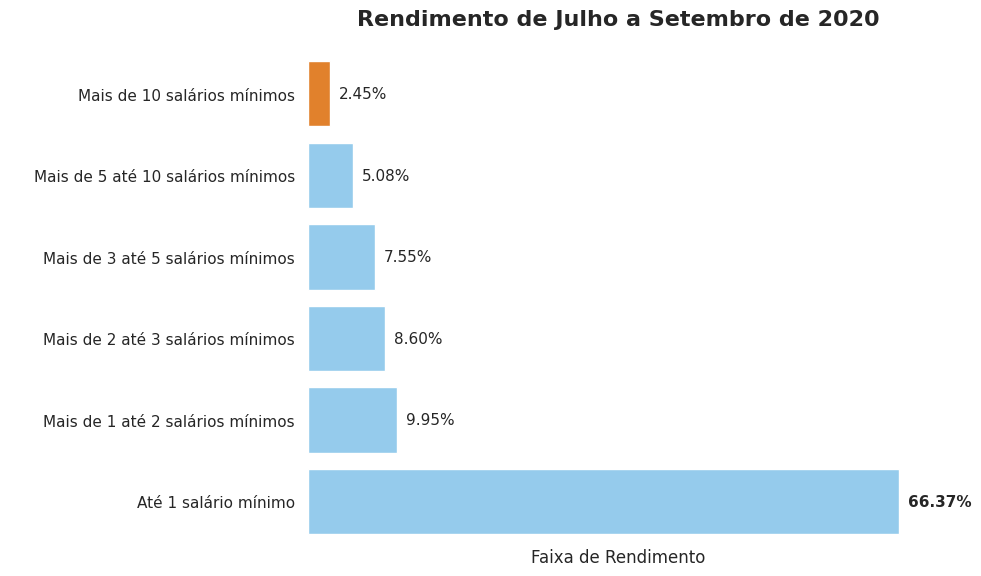

In [52]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ignorar FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Configuração global para gráficos padronizados
sns.set(style="white", context="notebook", font_scale=1.2)
plt.rcParams.update({
    "figure.figsize": (10, 6),  # Tamanho dos gráficos
    "axes.titlesize": 16,
    "axes.labelsize": 12,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "font.family": "DejaVu Sans",
})

def gerar_grafico_barras(df, coluna, titulo, xlabel, ylabel=" "):
    """
    Gera um gráfico de barras destacando o maior valor em laranja, barras menores em azul claro,
    e mostrando os valores ao lado das barras.
    """
    # Identificar o índice da barra com maior valor
    max_index = df["media_percentual"].idxmax()

    # Definir cores: azul claro para todas as barras, laranja para a de maior valor
    cores = ["#87CEFA"] * len(df)  # Azul claro para todas as barras
    cores[max_index] = "#FF7F0E"  # Laranja para o destaque

    # Gráfico de barras
    plt.figure()
    sns.barplot(
        x="media_percentual",
        y=coluna,
        data=df,
        palette=cores
    )

    # Adicionar valores ao final das barras
    for i, row in enumerate(df.itertuples()):
        plt.text(
            row.media_percentual + 1,  # Posição ao lado
            i,  # Linha específica do eixo Y
            f"{row.media_percentual:.2f}%",  # Texto formatado
            ha="left", va="center", fontsize=11,
            fontweight="bold" if row.media_percentual == df["media_percentual"].max() else "normal"
        )

    # Remover os valores do eixo X
    plt.gca().set_xticks([])  # Remove os valores do eixo X

    # Adicionar título e rótulos
    plt.title(titulo, pad=20, fontweight="bold")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Remover todas as bordas do gráfico
    for spine in ["top", "right", "left", "bottom"]:
        plt.gca().spines[spine].set_visible(False)

    # Ajuste final para layout
    plt.tight_layout()
    plt.show()

# Ordenar o DataFrame pela faixa de rendimento personalizada
ordem_personalizada = [
    "Mais de 10 salários mínimos",
    "Mais de 5 até 10 salários mínimos",
    "Mais de 3 até 5 salários mínimos",
    "Mais de 2 até 3 salários mínimos",
    "Mais de 1 até 2 salários mínimos",
    "Até 1 salário mínimo"
]

# Converter faixa_rendimento para uma Categorical com ordem
media_percentual_faixa_pandas["faixa_rendimento"] = pd.Categorical(
    media_percentual_faixa_pandas["faixa_rendimento"],
    categories=ordem_personalizada,
    ordered=True
)

# Ordenar o DataFrame
media_percentual_faixa_pandas = media_percentual_faixa_pandas.sort_values("faixa_rendimento")

# Gerar o gráfico
gerar_grafico_barras(
    media_percentual_faixa_pandas,
    "faixa_rendimento",
    "Rendimento de Julho a Setembro de 2020",
    "Faixa de Rendimento"
)
